# PANDAS AVANÇADO
---

# CARREGANDO OS DADOS
---

## Configurações do projeto

### Importando pacotes

In [254]:
import pandas as pd 
import numpy as np
import os
import re

In [2]:
pd.__version__

'1.3.2'

### Opções de configuração

[Documentação](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)

In [3]:
pd.get_option("display.max_rows")

60

In [4]:
pd.get_option("display.max_columns")

20

[Opções disponíveis](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options)

In [5]:
pd.describe_option("display.max_columns")

display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the width of the terminal and print a truncated object which fits
    the screen width. The IPython notebook, IPython qtconsole, or IDLE
    do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 20] [currently: 20]


In [6]:
data = np.arange(10000).reshape(100, 100)
data

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [7]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,100,101,102,103,104,105,106,107,108,109,...,190,191,192,193,194,195,196,197,198,199
2,200,201,202,203,204,205,206,207,208,209,...,290,291,292,293,294,295,296,297,298,299
3,300,301,302,303,304,305,306,307,308,309,...,390,391,392,393,394,395,396,397,398,399
4,400,401,402,403,404,405,406,407,408,409,...,490,491,492,493,494,495,496,497,498,499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9500,9501,9502,9503,9504,9505,9506,9507,9508,9509,...,9590,9591,9592,9593,9594,9595,9596,9597,9598,9599
96,9600,9601,9602,9603,9604,9605,9606,9607,9608,9609,...,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699
97,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,...,9790,9791,9792,9793,9794,9795,9796,9797,9798,9799
98,9800,9801,9802,9803,9804,9805,9806,9807,9808,9809,...,9890,9891,9892,9893,9894,9895,9896,9897,9898,9899


In [8]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

In [9]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
90,9000,9001,9002,9003,9004,9005,9006,9007,9008,9009,9010,9011,9012,9013,9014,9015,9016,9017,9018,9019,9020,9021,9022,9023,9024,9025,9026,9027,9028,9029,9030,9031,9032,9033,9034,9035,9036,9037,9038,9039,9040,9041,9042,9043,9044,9045,9046,9047,9048,9049,9050,9051,9052,9053,9054,9055,9056,9057,9058,9059,9060,9061,9062,9063,9064,9065,9066,9067,9068,9069,9070,9071,9072,9073,9074,9075,9076,9077,9078,9079,9080,9081,9082,9083,9084,9085,9086,9087,9088,9089,9090,9091,9092,9093,9094,9095,9096,9097,9098,9099
91,9100,9101,9102,9103,9104,9105,9106,9107,9108,9109,9110,9111,9112,9113,9114,9115,9116,9117,9118,9119,9120,9121,9122,9123,9124,9125,9126,9127,9128,9129,9130,9131,9132,9133,9134,9135,9136,9137,9138,9139,9140,9141,9142,9143,9144,9145,9146,9147,9148,9149,9150,9151,9152,9153,9154,9155,9156,9157,9158,9159,9160,9161,9162,9163,9164,9165,9166,9167,9168,9169,9170,9171,9172,9173,9174,9175,9176,9177,9178,9179,9180,9181,9182,9183,9184,9185,9186,9187,9188,9189,9190,9191,9192,9193,9194,9195,9196,9197,9198,9199
92,9200,9201,9202,9203,9204,9205,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215,9216,9217,9218,9219,9220,9221,9222,9223,9224,9225,9226,9227,9228,9229,9230,9231,9232,9233,9234,9235,9236,9237,9238,9239,9240,9241,9242,9243,9244,9245,9246,9247,9248,9249,9250,9251,9252,9253,9254,9255,9256,9257,9258,9259,9260,9261,9262,9263,9264,9265,9266,9267,9268,9269,9270,9271,9272,9273,9274,9275,9276,9277,9278,9279,9280,9281,9282,9283,9284,9285,9286,9287,9288,9289,9290,9291,9292,9293,9294,9295,9296,9297,9298,9299
93,9300,9301,9302,9303,9304,9305,9306,9307,9308,9309,9310,9311,9312,9313,9314,9315,9316,9317,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327,9328,9329,9330,9331,9332,9333,9334,9335,9336,9337,9338,9339,9340,9341,9342,9343,9344,9345,9346,9347,9348,9349,9350,9351,9352,9353,9354,9355,9356,9357,9358,9359,9360,9361,9362,9363,9364,9365,9366,9367,9368,9369,9370,9371,9372,9373,9374,9375,9376,9377,9378,9379,9380,9381,9382,9383,9384,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394,9395,9396,9397,9398,9399
94,9400,9401,9402,9403,9404,9405,9406,9407,9408,9409,9410,9411,9412,9413,9414,9415,9416,9417,9418,9419,9420,9421,9422,9423,9424,9425,9426,9427,9428,9429,9430,9431,9432,9433,9434,9435,9436,9437,9438,9439,9440,9441,9442,9443,9444,9445,9446,9447,9448,9449,9450,9451,9452,9453,9454,9455,9456,9457,9458,9459,9460,9461,9462,9463,9464,9465,9466,9467,9468,9469,9470,9471,9472,9473,9474,9475,9476,9477,9478,9479,9480,9481,9482,9483,9484,9485,9486,9487,9488,9489,9490,9491,9492,9493,9494,9495,9496,9497,9498,9499
95,9500,9501,9502,9503,9504,9505,9506,9507,9508,9509,9510,9511,9512,9513,9514,9515,9516,9517,9518,9519,9520,9521,9522,9523,9524,9525,9526,9527,9528,9529,9530,9531,9532,9533,9534,9535,9536,9537,9538,9539,9540,9541,9542,9543,9544,9545,9546,9547,9548,9549,9550,9551,9552,9553,9554,9555,9556,9557,9558,9559,9560,9561,9562,9563,9564,9565,9566,9567,9568,9569,9570,9571,9572,9573,9574,9575,9576,9577,9578,9579,9580,9581,9582,9583,9584,9585,9586,9587,9588,9589,9590,9591,9592,9593,9594,9595,9596,9597,9598,9599
96,9600,9601,9602,9603,9604,9605,9606,9607,9608,9609,9610,9611,9612,9613,9614,9615,9616,9617,9618,9619,9620,9621,9622,9623,9624,9625,9626,9627,9628,9629,9630,9631,9632,9633,9634,9635,9636,9637,9638,9639,9640,9641,9642,9643,9644,9645,9646,9647,9648,9649,9650,9651,9652,9653,9654,9655,9656,9657,9658,9659,9660,9661,9662,9663,9664,9665,9666,9667,9668,9669,9670,9671,9672,9673,9674,9675,9676,9677,9678,9679,9680,9681,9682,9683,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699
97,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723,9724,9725,9726,9727,9728,9729,9730,9731,9732,9733,9734,9735,9736,

reset_option retorna os valores padrões.

In [10]:
pd.reset_option("display.max_rows")

## Carregando os dados

### Arquivos JSON - `read_json`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)

## JSON

JSON (**J**ava**S**cript **O**bject **N**otation - Notação de Objetos JavaScript) é uma formatação leve de troca de dados. Para seres humanos, é fácil de ler e escrever. Para máquinas, é fácil de interpretar e gerar. Está baseado em um subconjunto da linguagem de programação JavaScript, Standard ECMA-262 3a Edição - Dezembro - 1999. JSON é em formato texto e completamente independente de linguagem, pois usa convenções que são familiares às linguagens C e familiares, incluindo C++, C#, Java, JavaScript, Perl, Python e muitas outras. Estas propriedades fazem com que JSON seja um formato ideal de troca de dados.

[fonte](https://www.json.org/json-pt.html)

[Online JSON Viewer](http://jsonviewer.stack.hu/)

In [11]:
_path = os.getcwd()
_path

'c:\\Users\\alexsandro.ignacio\\OneDrive - WCA Soluções de Inteligência Comercial\\Documentos\\Docs\\Git\\python_developer\\Pandas Tecnicas Avançadas'

In [12]:
_file_01 = 'realestates.json'
_file_02 = 'bairros.xlsx'


In [13]:
_path_file_01 = os.path.join(_path, _file_01)
_path_file_01

'c:\\Users\\alexsandro.ignacio\\OneDrive - WCA Soluções de Inteligência Comercial\\Documentos\\Docs\\Git\\python_developer\\Pandas Tecnicas Avançadas\\realestates.json'

In [14]:
dados = pd.read_json(path_or_buf=_path_file_01, orient='columns')
dados

,normal,highlights
output,{'listings': [{'imovel': {'tipos': {'proprieda...,{'listings': [{'imovel': {'tipos': {'proprieda...


### Exercício

In [15]:
data_json_ex_01 = '{"A":[1,2,3,4], "B":[5,6,7,8], "C":[9,10,11,12]}'
data_json_ex_01

'{"A":[1,2,3,4], "B":[5,6,7,8], "C":[9,10,11,12]}'

In [16]:
dados_ex_json_01 = pd.read_json(path_or_buf=data_json_ex_01, orient='index')
dados_ex_json_01

,0,1,2,3
A,1,2,3,4
B,5,6,7,8
C,9,10,11,12


In [17]:
dados_ex_json_02 = pd.read_json(path_or_buf=data_json_ex_01, orient='columns')
dados_ex_json_02

,A,B,C
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


In [18]:
data_json_02 = '{"Rita": {"Idade": 24, "Peso": 62, "Altura": 1.65}, "Zeca": {"Idade": 32, "Peso": 80, "Altura": 1.82}}'

In [19]:
dados_ex_01 = pd.read_json(path_or_buf=data_json_02, orient='columns')
dados_ex_01

,Rita,Zeca
Idade,24.00,32.00
Peso,62.00,80.00
Altura,1.65,1.82


In [20]:
dados_ex_02 = pd.read_json(path_or_buf=data_json_02, orient='index')
dados_ex_02

,Idade,Peso,Altura
Rita,24,62,1.65
Zeca,32,80,1.82


### Arquivos EXCEL - `read_excel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

In [21]:
_path_file_02 = os.path.join(_path, _file_02)
_path_file_02

'c:\\Users\\alexsandro.ignacio\\OneDrive - WCA Soluções de Inteligência Comercial\\Documentos\\Docs\\Git\\python_developer\\Pandas Tecnicas Avançadas\\bairros.xlsx'

In [22]:
bairros = pd.read_excel(io=_path_file_02,
                        sheet_name="Preço médio por tipo",
                        usecols="C:E",
                        header=2,
                        index_col=[0,1],
                        names=['bairros', 'tipo', 'valor_m2_bairro']
)
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

### Exercício

In [23]:
pd.read_excel(
    io=_path_file_02, 
    sheet_name="Residencial X Comercial", 
    usecols="B:E",
    index_col=[0, 1],
    skiprows=18,
    nrows=17,
    names=['Zonas', 'Bairros', 'Residencial', 'Comercial']
)

Residencial  Comercial
Zonas Bairros                                
Sul   Botafogo               14002       7972
      Catete                 15232       6259
      Copacabana             23318       9355
      Cosme Velho            10320       8177
      Flamengo               19636       7135
      Gávea                  13506       8211
      Humaitá                10603       5039
      Ipanema                15965       7293
      Jardim Botânico        17243       8095
      Lagoa                  24982       6584
      Laranjeiras            17307       7745
      Leblon                 13815       8125
      Leme                   15815       8587
      Rocinha                15110       9023
      São Conrado            20727       9587
      Urca                   22876       6607
      Vidigal                23470       5424

# TRANSFORMANDO E TRATANDO OS DADOS
---

## Transformando dados no formato JSON para uma tabela

In [24]:
dados

,normal,highlights
output,{'listings': [{'imovel': {'tipos': {'proprieda...,{'listings': [{'imovel': {'tipos': {'proprieda...


### `json_normalize`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html)

In [25]:
dados_normal = pd.json_normalize(data = dados['normal'])
dados_normal

,listings
0,"[{'imovel': {'tipos': {'propriedade': 'Casa'},..."


In [26]:
dados_normal['listings'].iloc[0][0:1]

[{'imovel': {'tipos': {'propriedade': 'Casa'},
   'endereco': {'bairro': 'Barra da Tijuca',
    'localizacao': {'type': 'Point',
     'coordinates': [-43.3039086, -23.0139692]}},
   'vagasGaragem': 4,
   'area': 279,
   'caracteristicas': {'propriedade': "['Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade']",
    'condominio': "['Churrasqueira', 'Salão de Jogos', 'Sauna', 'Estacionamento Visitantes', 'Playground', 'Salão de Festas', 'Porteiro 24 Horas', 'Estacionamento Coberto', 'Aceita Pet', 'Sistema de Incêndio', 'Segurança Interna', 'Bicicletário', 'Acessibilidade']",
    'entorno': "['Próximo a Escola Particular', 'Próximo ao Metrô', 'Próximo a Serviços de Saúde', 'Próximo a Centro Empresarial', 'Próximo a Restaurante', 'Próximo a Academia', 'Próximo a Praia', 'Próximo a Escola Pública', 'Próximo a Farmácia', 'Próximo a Parques e Áreas Verdes', 'Próximo a

In [27]:
type(dados_normal['listings'].iloc[0])

list

In [28]:
len(dados_normal['listings'].iloc[0])

50

In [29]:
dados_normal_listings = pd.json_normalize(data=dados_normal['listings'].iloc[0], sep='_')
dados_normal_listings.head(5)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular'],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."


In [30]:
pd.json_normalize(data=dados_normal['listings'].iloc[0], sep='_', max_level=2).head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,"{'type': 'Point', 'coordinates': [-43.3039086,...",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,"{'type': 'Point', 'coordinates': [0, 0]}",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [31]:
dados_normal_listings = pd.json_normalize(data=dados['normal'], sep='_', record_path=['listings'])
dados_normal_listings.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [32]:
dados_highlights_listings = pd.json_normalize(data=dados['highlights'], sep='_', record_path=['listings'])
dados_highlights_listings.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Engenho Novo,Point,"[-43.2634918, -22.8971768]",0,0,"['Sauna', 'Terraço', 'Acessibilidade', 'Mobili...","['Estacionamento Coberto', 'Estacionamento Vis...","['Próximo a Serviços de Saúde', 'Próximo ao Sh...",Padrão,Usado,195772.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
1,Cobertura,Vargem Grande,Point,"[-43.4907917, -22.988122]",1,61,[],"['Estacionamento Visitantes', 'Estacionamento ...","['Próximo ao Metrô', 'Próximo a Praia', 'Próxi...",Destaque,Usado,305000.0,0.0,667.0,162.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


### Exercício

In [33]:
data_json = '{"alunos": [{"Nome": "Rita", "Info": {"Idade": 24, "Medidas": {"Peso": 62, "Altura": 1.65}}}, {"Nome": "Zeca", "Info": {"Idade": 32, "Medidas": {"Peso": 80, "Altura": 1.82}}}]}'
data_json

'{"alunos": [{"Nome": "Rita", "Info": {"Idade": 24, "Medidas": {"Peso": 62, "Altura": 1.65}}}, {"Nome": "Zeca", "Info": {"Idade": 32, "Medidas": {"Peso": 80, "Altura": 1.82}}}]}'

In [34]:
data = pd.read_json(path_or_buf=data_json, orient='columns')
data

,alunos
0,"{'Nome': 'Rita', 'Info': {'Idade': 24, 'Medida..."
1,"{'Nome': 'Zeca', 'Info': {'Idade': 32, 'Medida..."


In [35]:
data = pd.read_json(path_or_buf=data_json, orient='columns')
pd.json_normalize(data=data['alunos'], sep='_', max_level=1)

,Nome,Info_Idade,Info_Medidas
0,Rita,24,"{'Peso': 62, 'Altura': 1.65}"
1,Zeca,32,"{'Peso': 80, 'Altura': 1.82}"


In [36]:
pd.json_normalize(data=data['alunos'], sep='_')

,Nome,Info_Idade,Info_Medidas_Peso,Info_Medidas_Altura
0,Rita,24,62,1.65
1,Zeca,32,80,1.82


## Trabalhando com dados textuais

### Transformando *strings* em listas do Python

In [37]:
dados_normal_listings.columns

Index(['imovel_tipos_propriedade', 'imovel_endereco_bairro',
       'imovel_endereco_localizacao_type',
       'imovel_endereco_localizacao_coordinates', 'imovel_vagasGaragem',
       'imovel_area', 'imovel_caracteristicas_propriedade',
       'imovel_caracteristicas_condominio', 'imovel_caracteristicas_entorno',
       'anuncio_tipos_publicacao', 'anuncio_tipos_listagem',
       'anuncio_valores_venda', 'anuncio_valores_aluguel',
       'anuncio_valores_condominio', 'anuncio_valores_iptu',
       'anuncio_descricao'],
      dtype='object')

In [38]:
lista_str = dados_normal_listings.loc[0, 'imovel_caracteristicas_propriedade']
lista_str

"['Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade']"

In [39]:
type(lista_str)

str

In [40]:
lista_str[1:-1]

"'Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade'"

In [41]:
lista_str.strip("[]")

"'Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade'"

In [42]:
lista = lista_str[1:-1].replace("'","").split(', ')
lista

['Área de Serviço',
 'Terraço',
 'Churrasqueira',
 'Quarto/WC Empregada',
 'Sauna',
 'Varanda',
 'Gás Encanado',
 'Closet',
 'Piscina',
 'Mobiliado',
 'Armários Planejados',
 'Acessibilidade']

In [43]:
type(lista)

list

#### Métodos de *strings*

[Documentação](https://docs.python.org/3.6/library/stdtypes.html#string-methods)

In [44]:
Texto = dados_normal_listings.loc[:, 'imovel_caracteristicas_propriedade']
Texto

0     ['Área de Serviço', 'Terraço', 'Churrasqueira'...
1                                             ['Sauna']
2     ['Acessibilidade', 'Área de Serviço', 'Sauna',...
3     ['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...
4                               ['Armários Planejados']
5     ['Mobiliado', 'Varanda', 'Closet', 'Churrasque...
6     ['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...
7     ['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...
8     ['Acessibilidade', 'Mobiliado', 'Churrasqueira...
9     ['Área de Serviço', 'Terraço', 'Ambientes Inte...
10    ['Closet', 'Ambientes Integrados', 'Área de Se...
11                                                   []
12    ['Piscina', 'Quarto/WC Empregada', 'Gás Encana...
13    ['Sauna', 'Terraço', 'Closet', 'Gás Encanado',...
14                                                   []
15    ['Quarto/WC Empregada', 'Varanda', 'Piscina', ...
16    ['Vista Panorâmica', 'Sauna', 'Área de Serviço...
17    ['Quarto/WC Empregada', 'Churrasqueira', '

### Exercício

In [45]:
data_string = "#-> Churrasqueira | Sauna | Mobiliado | Piscina <-#"

In [46]:
data_string[4:-4].split(' | ')

['Churrasqueira', 'Sauna', 'Mobiliado', 'Piscina']

In [47]:
data_string.strip("#->< ").split(' | ')

['Churrasqueira', 'Sauna', 'Mobiliado', 'Piscina']

#### `str`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html)

In [48]:
Texto.str[1:-1][:2]

0    'Área de Serviço', 'Terraço', 'Churrasqueira',...
1                                              'Sauna'
Name: imovel_caracteristicas_propriedade, dtype: object

In [49]:
Texto.str[1:-1].str.replace("'","")[:2]

0    Área de Serviço, Terraço, Churrasqueira, Quart...
1                                                Sauna
Name: imovel_caracteristicas_propriedade, dtype: object

In [50]:
Texto.str[1:-1].str.replace("'","").str.split(", ")[:2]

0    [Área de Serviço, Terraço, Churrasqueira, Quar...
1                                              [Sauna]
Name: imovel_caracteristicas_propriedade, dtype: object

In [51]:
Texto = Texto.str[1:-1].str.replace("'","").str.split(", ")[:2]
Texto

0    [Área de Serviço, Terraço, Churrasqueira, Quar...
1                                              [Sauna]
Name: imovel_caracteristicas_propriedade, dtype: object

In [52]:
type(Texto)

pandas.core.series.Series

#### `filter`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html)

In [53]:
dados_normal_listings.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [54]:
columns = dados_normal_listings.filter(like='imovel_caracteristicas_').columns
columns

Index(['imovel_caracteristicas_propriedade',
       'imovel_caracteristicas_condominio', 'imovel_caracteristicas_entorno'],
      dtype='object')

In [55]:
for col in columns:
    dados_normal_listings[col]= dados_normal_listings[col].str[1:-1].str.replace("'","").str.split(", ")
    dados_highlights_listings[col] = dados_highlights_listings[col].str[1:-1].str.replace("'","").str.split(", ")

In [56]:
dados_normal_listings.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [57]:
dados_highlights_listings.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Engenho Novo,Point,"[-43.2634918, -22.8971768]",0,0,"[Sauna, Terraço, Acessibilidade, Mobiliado, Vi...","[Estacionamento Coberto, Estacionamento Visita...","[Próximo a Serviços de Saúde, Próximo ao Shopp...",Padrão,Usado,195772.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
1,Cobertura,Vargem Grande,Point,"[-43.4907917, -22.988122]",1,61,[],"[Estacionamento Visitantes, Estacionamento Cob...","[Próximo ao Metrô, Próximo a Praia, Próximo a ...",Destaque,Usado,305000.0,0.0,667.0,162.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [58]:
dados_normal_listings.loc[0, 'imovel_caracteristicas_propriedade'][0]

'Área de Serviço'

In [59]:
dados_highlights_listings.loc[0, 'imovel_caracteristicas_propriedade'][0]

'Sauna'

### Exercício

In [60]:
dados = {
    "alunos": ["Rita", "Lucas", "Zeca", "Ana"], 
    "idade": [10, 12, 11, 10], 
    "medidas_altura": [1.3, 1.5, 1.45, 1.28], 
    "medidas_peso": [42, 50, 45, 38]
}

df = pd.DataFrame(dados)
df

,alunos,idade,medidas_altura,medidas_peso
0,Rita,10,1.30,42
1,Lucas,12,1.50,50
2,Zeca,11,1.45,45
3,Ana,10,1.28,38


In [61]:
df.filter(like='medidas', axis='columns')

,medidas_altura,medidas_peso
0,1.30,42
1,1.50,50
2,1.45,45
3,1.28,38


In [62]:

df.filter(items=[0,1], axis='index')

,alunos,idade,medidas_altura,medidas_peso
0,Rita,10,1.3,42
1,Lucas,12,1.5,50


# COMBINANDO CONJUNTOS DE DADOS
---

In [63]:
_df1 = dados_normal_listings
_df1.head(3)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."


In [64]:
_df2 = dados_highlights_listings
_df2.head(3)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Engenho Novo,Point,"[-43.2634918, -22.8971768]",0,0,"[Sauna, Terraço, Acessibilidade, Mobiliado, Vi...","[Estacionamento Coberto, Estacionamento Visita...","[Próximo a Serviços de Saúde, Próximo ao Shopp...",Padrão,Usado,195772.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
1,Cobertura,Vargem Grande,Point,"[-43.4907917, -22.988122]",1,61,[],"[Estacionamento Visitantes, Estacionamento Cob...","[Próximo ao Metrô, Próximo a Praia, Próximo a ...",Destaque,Usado,305000.0,0.0,667.0,162.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Imóvel Comercial,Ribeira,Point,"[-43.1690005, -22.8239272]",4,180,"[Vista Panorâmica, Acessibilidade, Área de Ser...","[Segurança Interna, Salão de Festas, Academia,...","[Próximo a Restaurante, Próximo a Praia, Próxi...",Padrão,Usado,1050000.0,0.0,0.0,315.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [65]:
_df1.columns == _df2.columns 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

## Empilhando *DataFrames*

### `append`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html)

In [66]:
_df1.append(_df2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
16,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
17,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
18,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [67]:
_df1.append(_df2, ignore_index=True)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [68]:
dados_listing_append = _df1.append(_df2, ignore_index=True)
dados_listing_append

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


Somente quando as colunas forem iguais para serem empilhadas

### `concat`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [69]:
dados_listing_concat = pd.concat([_df1, _df2])
dados_listing_concat

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
16,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
17,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
18,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [70]:
dados_listing_concat = pd.concat([_df1, _df2], ignore_index=True)
dados_listing_concat

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


### Exercício

In [71]:
df_A = pd.DataFrame({'A': [1, 2, 3], "B": [1, 4, 9]})
df_A


,A,B
0,1,1
1,2,4
2,3,9


In [72]:
df_B = pd.DataFrame({'A': [4, 5, 6], "B": [16, 25, 36]})
df_B

,A,B
0,4,16
1,5,25
2,6,36


In [73]:
df_A.columns == df_B.columns

array([ True,  True])

In [74]:
df_A_B_concat = pd.concat([df_A, df_B], ignore_index=True, sort=True)
df_A_B_concat


,A,B
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36


In [75]:
df_A_B_append = df_A.append(df_B, ignore_index=True, sort=True)
df_A_B_append

,A,B
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36


In [76]:
df_A_2 = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 4, 9]})
df_A_2


,A,B
0,1,1
1,2,4
2,3,9


In [77]:
df_B_2 = pd.DataFrame({'B': [16, 25, 36], 'A': [4, 5, 6]})
df_B_2

,B,A
0,16,4
1,25,5
2,36,6


In [78]:
df_A_B_concat_2 = pd.concat([df_A_2, df_B_2], ignore_index=True, sort=True)
df_A_B_concat_2 


,A,B
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36


In [79]:
df_A_B_append_2 = df_A_2.append(df_B_2, ignore_index=True, sort=True)
df_A_B_append_2

,A,B
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36


In [80]:
df_A_B_append_3 = df_B_2.append(df_A_2, ignore_index=True, sort=True)
df_A_B_append_3

,A,B
0,4,16
1,5,25
2,6,36
3,1,1
4,2,4
5,3,9


## Combinando *DataFrames* a partir de uma chave de ligação

In [81]:
dados_listing = dados_listing_concat

In [82]:
dados_listing.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [83]:
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

### Tratando a variável de ligação

#### Selecionando a variável de ligação nos dois *DataFrames*

In [84]:
bairros_amostra = dados_listing['imovel_endereco_bairro']
bairros_amostra

0     Barra da Tijuca
1        Campo Grande
2     Barra da Tijuca
3     Barra da Tijuca
4              Glória
           ...       
65         Copacabana
66             Leblon
67         Copacabana
68           Cachambi
69             Tijuca
Name: imovel_endereco_bairro, Length: 70, dtype: object

[Documentação: `get_level_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.get_level_values.html)

In [85]:
bairros_todos = bairros.index.get_level_values('bairros')
bairros_todos

Index(['São Cristóvão', 'São Cristóvão', 'São Cristóvão', 'São Cristóvão',
       'São Cristóvão', 'São Cristóvão', 'São Cristóvão', 'Benfica', 'Benfica',
       'Benfica',
       ...
       'Vila Kosmos', 'Vila Kosmos', 'Vila Kosmos', 'Vista Alegre',
       'Vista Alegre', 'Vista Alegre', 'Vista Alegre', 'Vista Alegre',
       'Vista Alegre', 'Vista Alegre'],
      dtype='object', name='bairros', length=1127)

#### Identificando e eliminando valores duplicados - `nunique` e `unique`

[Documentação: `nunique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)

[Documentação: `unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

In [86]:
bairros_amostra.shape

(70,)

In [87]:
bairros_amostra.nunique()

30

In [88]:
bairros_amostra.unique()

array(['Barra da Tijuca', 'Campo Grande', 'Glória', 'Vila Isabel',
       'Andaraí', 'Copacabana', 'Recreio dos Bandeirantes', 'Tijuca',
       'Méier', 'Ipanema', 'Paciência', 'Freguesia (Jacarepaguá)',
       'Vargem Pequena', 'Pechincha', 'Freguesia', 'Botafogo',
       'Vila da Penha', 'Jacarepaguá', 'Laranjeiras', 'Ribeira', 'Lapa',
       'Rocha', 'Flamengo', 'Engenho Novo', 'Vargem Grande', 'Praça Seca',
       'Honório Gurgel', 'Lagoa', 'Leblon', 'Cachambi'], dtype=object)

In [89]:
type(bairros_amostra.unique())

numpy.ndarray

In [90]:
bairros_amostra = pd.Series(bairros_amostra.unique())
bairros_amostra

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11     Freguesia (Jacarepaguá)
12              Vargem Pequena
13                   Pechincha
14                   Freguesia
15                    Botafogo
16               Vila da Penha
17                 Jacarepaguá
18                 Laranjeiras
19                     Ribeira
20                        Lapa
21                       Rocha
22                    Flamengo
23                Engenho Novo
24               Vargem Grande
25                  Praça Seca
26              Honório Gurgel
27                       Lagoa
28                      Leblon
29                    Cachambi
dtype: object

---

In [91]:
bairros_todos.shape

(1127,)

In [92]:
bairros_todos.nunique()

161

In [93]:
bairros_todos.unique()

Index(['São Cristóvão', 'Benfica', 'Caju', 'Catumbi', 'Centro', 'Cidade Nova',
       'Estácio', 'Gamboa', 'Glória', 'Lapa',
       ...
       'Ricardo de Albuquerque', 'Rocha Miranda', 'Tomás Coelho', 'Turiaçu',
       'Vaz Lobo', 'Vicente de Carvalho', 'Vigário Geral', 'Vila da Penha',
       'Vila Kosmos', 'Vista Alegre'],
      dtype='object', name='bairros', length=161)

In [94]:
type(bairros_todos.unique())

pandas.core.indexes.base.Index

In [95]:
bairros_todos = pd.Series(bairros_todos.unique())
bairros_todos

0            São Cristóvão
1                  Benfica
2                     Caju
3                  Catumbi
4                   Centro
              ...         
156    Vicente de Carvalho
157          Vigário Geral
158          Vila da Penha
159            Vila Kosmos
160           Vista Alegre
Name: bairros, Length: 161, dtype: object

#### Verificando se existe correspondência entre as variáveis de ligação

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html)

In [96]:
bairros_amostra

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11     Freguesia (Jacarepaguá)
12              Vargem Pequena
13                   Pechincha
14                   Freguesia
15                    Botafogo
16               Vila da Penha
17                 Jacarepaguá
18                 Laranjeiras
19                     Ribeira
20                        Lapa
21                       Rocha
22                    Flamengo
23                Engenho Novo
24               Vargem Grande
25                  Praça Seca
26              Honório Gurgel
27                       Lagoa
28                      Leblon
29                    Cachambi
dtype: object

In [97]:
bairros_amostra.isin(bairros_todos)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
dtype: bool

In [98]:
bairros.loc["Freguesia"]

,valor_m2_bairro
tipo,
Casa,15156
Apartamento,7930
Cobertura,15391
Consultório,4479
Imóvel Comercial,16730
Loja,7095
Sala Comercial,8666


In [99]:
bairros.loc["Jacarepaguá"]

,valor_m2_bairro
tipo,
Casa,19073
Apartamento,8574
Cobertura,16140
Consultório,7554
Imóvel Comercial,10599
Loja,7305
Sala Comercial,5023


In [100]:
bairros_amostra.isin(bairros_todos)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
dtype: bool

#### Ajustando os valores

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html)

In [101]:
dados_listing['imovel_endereco_bairro'].replace('Freguesia (Jacarepaguá)', 'Freguesia', inplace=True)

In [102]:
bairros_amostra = dados_listing['imovel_endereco_bairro']
bairros_amostra

0     Barra da Tijuca
1        Campo Grande
2     Barra da Tijuca
3     Barra da Tijuca
4              Glória
           ...       
65         Copacabana
66             Leblon
67         Copacabana
68           Cachambi
69             Tijuca
Name: imovel_endereco_bairro, Length: 70, dtype: object

In [103]:
bairros_amostra = pd.Series(bairros_amostra.unique())
bairros_amostra

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11                   Freguesia
12              Vargem Pequena
13                   Pechincha
14                    Botafogo
15               Vila da Penha
16                 Jacarepaguá
17                 Laranjeiras
18                     Ribeira
19                        Lapa
20                       Rocha
21                    Flamengo
22                Engenho Novo
23               Vargem Grande
24                  Praça Seca
25              Honório Gurgel
26                       Lagoa
27                      Leblon
28                    Cachambi
dtype: object

### Exercício

In [104]:
nomes = pd.Series(['Data Science', 'Big Data', 'DS', 'Machine Learning', 'ML'])
nomes

0        Data Science
1            Big Data
2                  DS
3    Machine Learning
4                  ML
dtype: object

In [105]:
pd.Series(nomes.replace(['DS', 'ML'], ['Data Science', 'Machine Learning']).unique())

0        Data Science
1            Big Data
2    Machine Learning
dtype: object

In [106]:
pd.Series(nomes.replace('DS', 'Data Science').replace('ML', 'Machine Learning').unique())

0        Data Science
1            Big Data
2    Machine Learning
dtype: object

### Combinando os *DataFrames*

#### `merge`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html)

```
pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes='_x', '_y', copy=True, indicator=False, validate=None)
```

**Parameters**

- **left**: DataFrame


- **right**: DataFrame
    

- **how**: {‘left’, ‘right’, ‘outer’, ‘inner’}, *default* ‘inner’

        Tipo de junção que será realizada.

        - left: usa apenas as chaves do DataFrame especificado no parâmetro left.

        - right: usa apenas as chaves do DataFrame especificado no parâmetro right.

        - outer: considera todos os registros dos DataFrames especificados nos parâmetros left e right, isto é, faz a união das chaves.

        - inner: considera apenas a interseção das chaves dos DataFrames especificados nos parâmetros left e right.
    

- **on**: label ou list

        Nomes das colunas ou dos índices que serão utilizados na junção. Estes devem ser encontrados em ambos os DataFrames.
        

- **left_on**: label ou list, or array-like

        Nomes das colunas ou dos índices do DataFrame especificado em left que serão utilizados na junção.
        

- **right_on**: label or list, or array-like

        Nomes das colunas ou dos índices do DataFrame especificado em right que serão utilizados na junção.
    

- **left_index**: bool, *default False*

        Indica se o índice do DataFrame especificado no parâmetro left deve ser utilizado como chave de junção.
        

- **right_index**: bool, *default False*

        Indica se o índice do DataFrame especificado no parâmetro right deve ser utilizado como chave de junção.

In [107]:
dados_listing.columns

Index(['imovel_tipos_propriedade', 'imovel_endereco_bairro',
       'imovel_endereco_localizacao_type',
       'imovel_endereco_localizacao_coordinates', 'imovel_vagasGaragem',
       'imovel_area', 'imovel_caracteristicas_propriedade',
       'imovel_caracteristicas_condominio', 'imovel_caracteristicas_entorno',
       'anuncio_tipos_publicacao', 'anuncio_tipos_listagem',
       'anuncio_valores_venda', 'anuncio_valores_aluguel',
       'anuncio_valores_condominio', 'anuncio_valores_iptu',
       'anuncio_descricao'],
      dtype='object')

In [108]:
col = [ 'imovel_endereco_bairro' , 'imovel_tipos_propriedade' ]
dados_listing[col]

,imovel_endereco_bairro,imovel_tipos_propriedade
0,Barra da Tijuca,Casa
1,Campo Grande,Apartamento
2,Barra da Tijuca,Cobertura
3,Barra da Tijuca,Cobertura
4,Glória,Sala Comercial
...,...,...
65,Copacabana,Apartamento
66,Leblon,Apartamento
67,Copacabana,Casa
68,Cachambi,Sala Comercial


In [109]:
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

In [110]:
dados_listing = pd.merge(
    left= dados_listing, 
    right= bairros,
    left_on= [ 'imovel_endereco_bairro' , 'imovel_tipos_propriedade' ],
    right_index=True
)
dados_listing

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835
47,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425
16,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",Padrão,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964
63,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",Padrão,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199
64,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",Padrão,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388


### Exercício

In [111]:
df_1 = pd.DataFrame([2, 4, 6, 8], index=['A', 'B', 'C', 'D'], columns=['pares'])
df_1

,pares
A,2
B,4
C,6
D,8


In [112]:
df_2 = pd.DataFrame([1, 3, 5, 7], index=['C', 'D', 'E', 'F'], columns=['impares'])
df_2

,impares
C,1
D,3
E,5
F,7


In [113]:
pd.merge(
    left=df_1, 
    right=df_2,
    left_index=True,
    right_index=True,
    how='inner'
)

,pares,impares
C,6,1
D,8,3


In [114]:
pd.merge(
    left=df_1, 
    right=df_2,
    left_index=True,
    right_index=True,
    how='left'
)

,pares,impares
A,2,NaN
B,4,NaN
C,6,1.0
D,8,3.0


In [115]:
pd.merge(
    left=df_1, 
    right=df_2,
    left_index=True,
    right_index=True,
    how='outer'
)

,pares,impares
A,2.0,NaN
B,4.0,NaN
C,6.0,1.0
D,8.0,3.0
E,NaN,5.0
F,NaN,7.0


In [116]:
(lambda x: (x+3)*5 / 2 ) (10)

32.5

# ADICIONANDO INFORMAÇÕES
---

## Criando as colunas `quartos`, `suites` e `banheiros`

In [117]:
dados_listing['anuncio_descricao'].values[:10]

array(['Amplo imóvel para venda com 3 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 4 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 5 quartos, sendo 4 suítes, e 5 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 0 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 1 quartos, sendo 0 suítes, e 0 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.'],
      dtype=object)

### `str.extractall`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extractall.html)

In [118]:
configuracao = dados_listing['anuncio_descricao'].str.extractall('(\d+)')
configuracao.head(9)

0
   match   
0  0      3
   1      1
   2      2
47 0      4
   1      1
   2      2
1  0      2
   1      0
   2      1

### `unstack`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)

In [119]:
configuracao.unstack()

0      
match  0  1  2
0      3  1  2
1      2  0  1
2      5  4  5
3      2  1  2
4      0  0  1
..    .. .. ..
65     4  2  3
66     3  1  2
67     1  0  1
68     3  1  2
69     3  1  2

[70 rows x 3 columns]

In [120]:
configuracao = configuracao.unstack().rename(columns = {0:'quartos', 1:'suites', 2:'banheiros'})
configuracao

quartos                 
match quartos suites banheiros
0           3      1         2
1           2      0         1
2           5      4         5
3           2      1         2
4           0      0         1
..        ...    ...       ...
65          4      2         3
66          3      1         2
67          1      0         1
68          3      1         2
69          3      1         2

[70 rows x 3 columns]

In [121]:
configuracao.columns

MultiIndex([('quartos',   'quartos'),
            ('quartos',    'suites'),
            ('quartos', 'banheiros')],
           names=[None, 'match'])

### `droplevel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.droplevel.html)

In [122]:
configuracao = configuracao.droplevel(level=0, axis=1)
configuracao

match,quartos,suites,banheiros
0,3,1,2
1,2,0,1
2,5,4,5
3,2,1,2
4,0,0,1
...,...,...,...
65,4,2,3
66,3,1,2
67,1,0,1
68,3,1,2


In [123]:
dados_listing.head(1)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835


In [124]:
dados_listing.shape

(70, 17)

In [125]:
dados_listing = pd.merge(dados_listing, configuracao, left_index=True, right_index=True )
print(f"{dados_listing.shape}")
dados_listing.head(1)

(70, 20)


,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2


### Exercício

Os parênteses (()) são utilizados para definir um grupo dentro da expressão, o (\d) indica que procuramos por dígitos numéricos de 0 a 9 e o sinal de mais (+) significa "corresponder a um ou mais" da expressão anterior a ele. Mas imagine que agora estamos procurando por números de CEP ou números telefônicos dentro de sequências de texto. Considere a seguinte Series com informações de um grupo de pessoas:

In [126]:
pessoas = pd.Series([
    'Nome: Mariana Sousa | End.: Rua Damasco, 1978 Japeri-RJ 26.473-790 | Tel.: (21) 99131-8473',
    'Nome: Aline Cardoso | End.: Rua Paschoal Marmirolli, 577 Sumaré-SP 13.171-700 | Tel.: (19) 8577-4777',
    'Nome: Vitór Fernandes | Tel.: (21) 5923-5723 | End.: Rua Bernardo Franco, 1520 São Gonçalo-RJ 24.470-190',
    'Nome: Victor Sousa | Tel.: (11) 98618-2626 | End.: Rua Santa Terezinha, 27 Suzano-SP 08.694-410',
    'Nome: Vitória Dias | Tel.: (19) 97632-5829 | End.: Rua 4 JA, 500 Rio Claro-SP 13.506-010',
    'Nome: Douglas Santos | Tel.: (11) 4890-8192 | End.: Rua Alcides Teodoro Santos, 1268 São Paulo-SP 05.762-010',
    'Nome: Kauan Pinto | Tel.: (14) 6752-6858 | End.: Rua Amélia Volta Laplechade, 1334 Marília-SP 17.511-801',
    'Nome: Miguel Silva | End.: Rua Severina Ferreira, 1408 João Pessoa-PB 58.034-160 | Tel.: (83) 7077-6476',
    'Nome: Luis Castro | Tel.: (31) 97711-4493 | End.: Rua São Bento, 969 Ribeirão das Neves-MG 33.930-290',
    'Nome: Thiago Almeida | Tel.: (18) 2031-3622 | End.: Rua Liberdade, 669 Araçatuba-SP 16.015-425'
])

pessoas[0:2]

0    Nome: Mariana Sousa | End.: Rua Damasco, 1978 ...
1    Nome: Aline Cardoso | End.: Rua Paschoal Marmi...
dtype: object

In [127]:
pessoas.size

10

Extract CEP:

In [128]:
pessoas.str.extractall('(\d{2}.\d{3}-\d{3})')

,,0
,match,
0,0,26.473-790
1,0,13.171-700
2,0,24.470-190
3,0,08.694-410
4,0,13.506-010
5,0,05.762-010
6,0,17.511-801
7,0,58.034-160
8,0,33.930-290


Veja que você também pode especificar o número exato de correspondências com o uso de números dentro da chaves:

* {n}: exatamente n ocorrências
* {n,}: n ou mais ocorrências
* {,m}: no máximo m ocorrências
* {n,m}: entre n e m ocorrências
  
No código anterior, \d{2} indica que naquela posição devemos ter exatamente dois dígitos numéricos.

Extract TEL:

In [129]:
pessoas.str.extractall('(\(\d{2}\)\s\d{4,5}-\d{4})')

,,0
,match,
0,0,(21) 99131-8473
1,0,(19) 8577-4777
2,0,(21) 5923-5723
3,0,(11) 98618-2626
4,0,(19) 97632-5829
5,0,(11) 4890-8192
6,0,(14) 6752-6858
7,0,(83) 7077-6476
8,0,(31) 97711-4493


Extract NUM:

In [130]:
pessoas.str.extractall('(\,\s\d{1,5})')

,,0
,match,
0,0,", 1978"
1,0,", 577"
2,0,", 1520"
3,0,", 27"
4,0,", 500"
5,0,", 1268"
6,0,", 1334"
7,0,", 1408"
8,0,", 969"


Extract NOME:

In [131]:
pessoas.str.extractall('(\:\w{1,30}\s\w{1,30})')

,,0
,match,


In [132]:
pessoas.str.extractall('(\w{1,4}:\s\w{1,30}\s\w{1,30})\,')

,,0
,match,


Extract END:

In [133]:
pessoas.str.extractall('(\.:\s\w{1,4}\s?\w{1,30}\s?\w{1,30})')

,,0
,match,
0,0,.: Rua Damasco
1,0,.: Rua Paschoal Marmirolli
2,0,.: Rua Bernardo Franco
3,0,.: Rua Santa Terezinha
4,0,.: Rua 4 JA
5,0,.: Rua Alcides Teodoro
6,0,.: Rua Amélia Volta
7,0,.: Rua Severina Ferreira
8,0,.: Rua São Bento


In [134]:
pessoas[9:10]

9    Nome: Thiago Almeida | Tel.: (18) 2031-3622 | ...
dtype: object

In [135]:
anuncios = pd.Series([
    "Amplo apartamento com vista para o mar, piscina, sauna e 2 vagas de garagem. CEP 22790-735",
    "Ótima oportunidade no Leblon! Casa de condomínio com 800m² próximo a praia.",
    "Sala e quarto em Copacabana. Próximo ao metrô.",
    "Venha morar na melhor localização do Rio de Janeiro. Piscina, academia e toda estrutura de lazer.",
    "Sala comercial no Centro da cidade. 23456-021",
    "Venha conhecer o melhor de Ipanema. A duas quadras da praia. Conheça o apartamento mobiliado.",
    "Melhor localização da Barra. Condomínio com piscina, academia, espaço gourmet e muito mais.",
    "Vende-se terreno em Pedra de Guaratiba. Tratar direto com o proprietário.",
    "Apartamento de alto padrão na Lagoa. Vista pro mar e sol da manhã.",
    "Passo o ponto de loja no centro da cidade (Saara). Ligar para (21) 1234-5678 e falar com Juca."
])
anuncios[0:1]

0    Amplo apartamento com vista para o mar, piscin...
dtype: object

In [136]:
anuncios.size

10

In [137]:
anuncios.str.upper().str.contains('PISCINA', regex=False)

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
9    False
dtype: bool

In [138]:
lista_anuncios_upper = anuncios.str.upper().str.contains('PISCINA', regex=False)
lista_anuncios_upper = lista_anuncios_upper[lista_anuncios_upper == True]
lista_anuncios_upper

0    True
3    True
6    True
dtype: bool

In [139]:
anuncios.str.lower().str.contains('piscina', regex=False)

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
9    False
dtype: bool

In [140]:
lista_anuncios_lower = anuncios.str.lower().str.contains('piscina', regex=False)
lista_anuncios_lower = lista_anuncios_lower[lista_anuncios_lower == True]
lista_anuncios_lower

0    True
3    True
6    True
dtype: bool

O Regex no Python segue uma lista de elementos e de significados para possibilitar que as operações sejam executadas. 

*  conjunto de  caracteres;                        []
* sequência especial de caracteres;                \ 
* buscar elementos no início da string;            ^
* buscar elementos no final da string;             $
* buscar zero ou mais repetições de uma substring; *
* uma ou mais aparições de uma substring;          +
* zero ou uma aparição;                            ?
* busca um caractere ou outro.                     |

Conheça as principais funções Regex
Vamos comentar agora as principais funções do Regex no Python. 

1. re.match
A sintaxe é re.match(padrão, string, flags=0) e tenta encontrar um padrão dentro de uma string. Por exemplo, seguindo o exemplo que já mencionamos, você pode usar para tentar achar o padrão de um CPF. 

Caso a função não encontre o que procura, vai retornar None. 

2. re.findall
Para retornar uma lista de elementos com aquele padrão, use o findall. Ele é muito útil quando você necessita de todas as ocorrências de uma substring, em um dado padrão, para então manipular isso de alguma forma.

Um exemplo de uso é captar todos os advérbios de uma frase, por exemplo. 

3. re.sub
Serve para buscar um padrão e substituí-lo por outro. Então, retorna uma nova string, a que tomou o lugar da anterior. Em caso de não encontrar o padrão, retorna a string normal.

4. re.finditer
Essa função faz uma iteração de strings em busca de um dado padrão. A sintaxe é finditem(padrão, string, flags). Ou seja, faz um loop entre as correspondentes para localizá-las e retorna também o índice dessas strings. 

Aliás, essa é a diferença para o findall: o retorno do índice.

5. re.search
Permite a busca por um padrão e retorna informações completas, como a posição inicial e a final daquele padrão dentro de uma string, além, é claro, da própria string.

Essa função retorna somente a primeira ocorrência de uma dada string. Para encontrar todas as aparições, você deve recorrer ao findall, como já falamos. 

In [141]:
texto = 'arara'
regex_busca = re.compile(r'a...a') 
check = regex_busca.findall(texto)
print(f"{check}")


['arara']


In [142]:
texto = 'arara'
regex_busca_t = re.compile(r'[^a]') 
regex_busca_q = re.compile(r'^a') 
check_1 = regex_busca_t .findall(texto)
check_2 = regex_busca_q.findall(texto)
print(f"{check_1}")
print(f"{check_2}")


['r', 'r']
['a']


In [143]:
texto = 'arara'
regex_busca = re.compile(r'a') 

# Comparando métodos
check_findall = regex_busca.findall(texto)
check_match = regex_busca.match(texto)
check_search = regex_busca.search(texto)
check_finditer = regex_busca.finditer(texto)

print(f"{check_findall}")
print(f"{check_match}")
print(f"{check_search}")
print(f"{check_finditer}")

['a', 'a', 'a']
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='a'>


O método match traz o padrão de string e posição da lista:

* match ele só busca no início da string
* search procura em toda a string

finditer cria uma lista das ocorrências que foram encontradas e pode ser utilizado um for para vizualizar essas ocorrências.

In [144]:
correspodencias = check_finditer
for correspodencia in correspodencias:
    print(correspodencia)

<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(2, 3), match='a'>
<re.Match object; span=(4, 5), match='a'>


In [145]:
texto = '''Arara 1992'''
regex_busca_char_set = re.compile(r'[a-zA-Z\s0-9]') 

print(f"len texto: {len(texto)}")

correspodencias = regex_busca_char_set.finditer(texto)
for correspodencia in correspodencias:
    print(correspodencia)

len texto: 10
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(1, 2), match='r'>
<re.Match object; span=(2, 3), match='a'>
<re.Match object; span=(3, 4), match='r'>
<re.Match object; span=(4, 5), match='a'>
<re.Match object; span=(5, 6), match=' '>
<re.Match object; span=(6, 7), match='1'>
<re.Match object; span=(7, 8), match='9'>
<re.Match object; span=(8, 9), match='9'>
<re.Match object; span=(9, 10), match='2'>


In [146]:
texto = '''
Arara 1992'''
regex_busca_char_set = re.compile(r'[a-zA-Z\s0-9]') 

print(f"len texto: {len(texto)}")

correspodencias = regex_busca_char_set.finditer(texto)
for correspodencia in correspodencias:
    print(correspodencia)

len texto: 11
<re.Match object; span=(0, 1), match='\n'>
<re.Match object; span=(1, 2), match='A'>
<re.Match object; span=(2, 3), match='r'>
<re.Match object; span=(3, 4), match='a'>
<re.Match object; span=(4, 5), match='r'>
<re.Match object; span=(5, 6), match='a'>
<re.Match object; span=(6, 7), match=' '>
<re.Match object; span=(7, 8), match='1'>
<re.Match object; span=(8, 9), match='9'>
<re.Match object; span=(9, 10), match='9'>
<re.Match object; span=(10, 11), match='2'>


In [147]:
texto = '''
Arara 1992'''
regex_busca_char_set = re.compile(r'[a-zA-Z0-9]') 

print(f"len texto: {len(texto)}")

correspodencias = regex_busca_char_set.finditer(texto)
for correspodencia in correspodencias:
    print(correspodencia)

len texto: 11
<re.Match object; span=(1, 2), match='A'>
<re.Match object; span=(2, 3), match='r'>
<re.Match object; span=(3, 4), match='a'>
<re.Match object; span=(4, 5), match='r'>
<re.Match object; span=(5, 6), match='a'>
<re.Match object; span=(7, 8), match='1'>
<re.Match object; span=(8, 9), match='9'>
<re.Match object; span=(9, 10), match='9'>
<re.Match object; span=(10, 11), match='2'>


In [148]:
# * 0 ou mais
texto = '''
Arara'''

regex_busca_char_set = re.compile(r'[ra]*') 

print(f"len texto: {len(texto)}")

correspodencias = regex_busca_char_set.finditer(texto)
for correspodencia in correspodencias:
    print(correspodencia)

len texto: 6
<re.Match object; span=(0, 0), match=''>
<re.Match object; span=(1, 1), match=''>
<re.Match object; span=(2, 6), match='rara'>
<re.Match object; span=(6, 6), match=''>


In [149]:
# + 1 ou mais
texto = '''
Arara'''

regex_busca_char_set = re.compile(r'[ra]+') 

print(f"len texto: {len(texto)}")

correspodencias = regex_busca_char_set.finditer(texto)
for correspodencia in correspodencias:
    print(correspodencia)

len texto: 6
<re.Match object; span=(2, 6), match='rara'>


In [150]:
# + 1 ou mais
texto = '''
Arara Arara Verde'''

regex_busca_char_set = re.compile(r'[ra]+') 

print(f"len texto: {len(texto)}")

correspodencias = regex_busca_char_set.finditer(texto)
for correspodencia in correspodencias:
    print(correspodencia)

len texto: 18
<re.Match object; span=(2, 6), match='rara'>
<re.Match object; span=(8, 12), match='rara'>
<re.Match object; span=(15, 16), match='r'>


In [151]:
# ? 0 ou  1 vez
texto = '''
Arara'''

regex_busca_char_set = re.compile(r'[ra]?') 

print(f"len texto: {len(texto)}")

correspodencias = regex_busca_char_set.finditer(texto)
for correspodencia in correspodencias:
    print(correspodencia)

len texto: 6
<re.Match object; span=(0, 0), match=''>
<re.Match object; span=(1, 1), match=''>
<re.Match object; span=(2, 3), match='r'>
<re.Match object; span=(3, 4), match='a'>
<re.Match object; span=(4, 5), match='r'>
<re.Match object; span=(5, 6), match='a'>
<re.Match object; span=(6, 6), match=''>


In [152]:
emails='''
Vários e-mails:
daniel@dominio.com
daniel.candiotto@dominio.com.br
DANIEL@dominio.br
DANIEL.CANDIOTTO@gov.br 
danielcandiotto1@dominio1.com
daniel_candiotto_1@dominio-dominio.net
'''


In [153]:
regex_busca = re.compile(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+') 

correspodencias = regex_busca.finditer(emails)
for correspodencia in correspodencias:
    print(correspodencia)

<re.Match object; span=(17, 35), match='daniel@dominio.com'>
<re.Match object; span=(36, 67), match='daniel.candiotto@dominio.com.br'>
<re.Match object; span=(68, 85), match='DANIEL@dominio.br'>
<re.Match object; span=(86, 109), match='DANIEL.CANDIOTTO@gov.br'>
<re.Match object; span=(111, 140), match='danielcandiotto1@dominio1.com'>
<re.Match object; span=(141, 179), match='daniel_candiotto_1@dominio-dominio.net'>


## Criando novas classificações

### Com dados categóricos - `map`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

In [154]:
tipo_uso = {
    'Apartamento': 'Residencial',
    'Casa': 'Residencial',
    'Cobertura': 'Residencial',
    'Consultório': 'Comercial',
    'Imóvel Comercial': 'Comercial',
    'Loja': 'Comercial',
    'Sala Comercial': 'Comercial'
}

In [155]:
dados_listing['imovel_tipos_propriedade'].map(tipo_uso)

0     Residencial
47    Residencial
1     Residencial
16    Residencial
2     Residencial
         ...     
60    Residencial
63    Residencial
64    Residencial
66    Residencial
68      Comercial
Name: imovel_tipos_propriedade, Length: 70, dtype: object

In [156]:
imovel_tipos_uso = dados_listing['imovel_tipos_propriedade'].map(tipo_uso) 

#### `insert`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html)

In [157]:
dados_listing.insert(loc=0, column='imovel_tipos_uso', value=imovel_tipos_uso)

In [158]:
dados_listing.head(2)

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2


### Exercício

In [159]:
df_ex_insert = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df_ex_insert.insert(loc=0, column='A', value=[5, 6], allow_duplicates=True)
df_ex_insert

,A,A,B
0,5,1,3
1,6,2,4


### Com dados numéricos - `cut`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

#### Utilizando classes fixas

In [160]:
valor_minimo = dados_listing['anuncio_valores_venda'].min()
valor_minimo

0.0

In [161]:
valor_maximo = dados_listing['anuncio_valores_venda'].max()
valor_maximo

24000000.0

In [162]:
rotulos = ['Popular', 'Padrão', 'Alto Padrão']

In [163]:
dados_listing.shape

(70, 21)

In [164]:
pd.cut(x=dados_listing['anuncio_valores_venda'], bins=3 )[0]

Interval(-24000.0, 8000000.0, closed='right')

In [165]:
pd.cut(x=dados_listing['anuncio_valores_venda'], bins=3, labels=rotulos )

0     Popular
47    Popular
1     Popular
16    Popular
2     Popular
       ...   
60    Popular
63    Popular
64    Popular
66    Popular
68    Popular
Name: anuncio_valores_venda, Length: 70, dtype: category
Categories (3, object): ['Popular' < 'Padrão' < 'Alto Padrão']

#### Utilizando classes personalizadas

In [166]:
# É preciso N pontos para obter N -1 Classes

In [167]:
classes = [valor_minimo, 400000, 2000000, valor_maximo]

In [168]:
pd.cut(x=dados_listing['anuncio_valores_venda'], bins=classes, labels=rotulos, include_lowest=True )

0     Alto Padrão
47    Alto Padrão
1         Popular
16         Padrão
2     Alto Padrão
         ...     
60        Popular
63        Popular
64        Popular
66    Alto Padrão
68         Padrão
Name: anuncio_valores_venda, Length: 70, dtype: category
Categories (3, object): ['Popular' < 'Padrão' < 'Alto Padrão']

In [169]:
dados_listing['classe_valor'] = pd.cut(x=dados_listing['anuncio_valores_venda'], bins=classes, labels=rotulos, include_lowest=True )

In [170]:
dados_listing

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros,classe_valor
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2,Alto Padrão
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2,Alto Padrão
1,Residencial,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1,Popular
16,Residencial,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1,Padrão
2,Residencial,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5,Alto Padrão
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Residencial,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",Padrão,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1,Popular
63,Residencial,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",Padrão,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1,Popular
64,Residencial,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",Padrão,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1,Popular
66,Residencial,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2,Alto Padrão


### Exercício

In [171]:
df_cut = pd.DataFrame(
    {
        'alunos': ['Juca', 'Zeca', 'Ana', 'Rita', 'Lia', 'Beto'],
        'notas': [8, 6.5, 10, 7, 6, 0]
    }
).set_index('alunos')
df_cut

,notas
alunos,
Juca,8.0
Zeca,6.5
Ana,10.0
Rita,7.0
Lia,6.0
Beto,0.0


### Classificação

In [172]:
df_classificacao = pd.DataFrame({
    'notas':['De 0 até 5.9', 'De 6 até 6.9', 'De 7 até 10'],
    'resultado':['Reprovado', 'Recuperação', 'Aprovado']
})
df_classificacao

,notas,resultado
0,De 0 até 5.9,Reprovado
1,De 6 até 6.9,Recuperação
2,De 7 até 10,Aprovado


In [173]:
classes=[0, 5.9, 6.9, 10]
rotulos=['Reprovado', 'Recuperação', 'Aprovado']
df_cut['resultado']=pd.cut(x=df_cut['notas'], bins=classes, labels=rotulos, include_lowest=True)
df_cut

,notas,resultado
alunos,,
Juca,8.0,Aprovado
Zeca,6.5,Recuperação
Ana,10.0,Aprovado
Rita,7.0,Aprovado
Lia,6.0,Recuperação
Beto,0.0,Reprovado


## Novas colunas derivadas das informações existentes

### Valor por m²

In [174]:
dados_listing['valor_m2'] = dados_listing['anuncio_valores_venda'] / dados_listing['imovel_area']
dados_listing['valor_m2']

0     8.602151e+03
47    8.648649e+03
1     3.333333e+03
16    1.750000e+04
2     1.157895e+04
          ...     
60    5.285714e+03
63             inf
64    4.274194e+03
66    2.064220e+04
68    4.485507e+03
Name: valor_m2, Length: 70, dtype: float64

In [175]:
dados_listing[['anuncio_valores_venda', 'imovel_area', 'valor_m2']].iloc[16:19]

,anuncio_valores_venda,imovel_area,valor_m2
8,1390000.0,214,6495.327103
13,370583.0,0,inf
24,1600000.0,300,5333.333333


#### `apply`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [176]:
valor_m2 = lambda data: data['anuncio_valores_venda'] / data['imovel_area'] if data['imovel_area'] != 0 else 0

In [177]:
dados_listing['valor_m2'] = dados_listing.apply(valor_m2, axis=1) 

In [178]:
dados_listing[['anuncio_valores_venda', 'imovel_area', 'valor_m2']].iloc[16:19]

,anuncio_valores_venda,imovel_area,valor_m2
8,1390000.0,214,6495.327103
13,370583.0,0,0.000000
24,1600000.0,300,5333.333333


### Piscina?

In [179]:
dados_listing['imovel_caracteristicas_condominio'][2]

['Sauna',
 'Playground',
 'Quadra Poliesportiva',
 'Salão de Festas',
 'Serviço de Transporte no Condomínio',
 'Sistema de Incêndio',
 'Salão de Jogos',
 'Piscina',
 'Aceita Pet']

In [180]:
dados_listing['Piscina'] = dados_listing['imovel_caracteristicas_condominio'].apply(lambda x: 'Piscina' in x)

In [181]:
dados_listing[['imovel_caracteristicas_condominio', 'Piscina']].head()

,imovel_caracteristicas_condominio,Piscina
0,"[Churrasqueira, Salão de Jogos, Sauna, Estacio...",False
47,"[Churrasqueira, Depósito Privativo, Quadra Pol...",True
1,"[Elevador, Playground, Salão de Festas, Sistem...",False
16,"[Bicicletário, Comércio/Serviços no Condomínio...",False
2,"[Sauna, Playground, Quadra Poliesportiva, Salã...",True


In [182]:
pd.set_option('display.max_colwidth', None)

In [183]:
dados_listing[['imovel_caracteristicas_condominio', 'Piscina']].head()

,imovel_caracteristicas_condominio,Piscina
0,"[Churrasqueira, Salão de Jogos, Sauna, Estacionamento Visitantes, Playground, Salão de Festas, Porteiro 24 Horas, Estacionamento Coberto, Aceita Pet, Sistema de Incêndio, Segurança Interna, Bicicletário, Acessibilidade]",False
47,"[Churrasqueira, Depósito Privativo, Quadra Poliesportiva, Comércio/Serviços no Condomínio, Estacionamento Coberto, Acessibilidade, Segurança Interna, Sauna, Piscina, Elevador, Bicicletário, Salão de Jogos, Sistema de Incêndio, Academia, Estacionamento Visitantes, Playground, Serviço de Transporte no Condomínio, Salão de Festas]",True
1,"[Elevador, Playground, Salão de Festas, Sistema de Incêndio, Salão de Jogos, Depósito Privativo, Porteiro 24 Horas, Academia, Churrasqueira, Quadra Poliesportiva]",False
16,"[Bicicletário, Comércio/Serviços no Condomínio, Salão de Festas, Estacionamento Coberto, Segurança Interna, Quadra Poliesportiva, Churrasqueira, Aceita Pet]",False
2,"[Sauna, Playground, Quadra Poliesportiva, Salão de Festas, Serviço de Transporte no Condomínio, Sistema de Incêndio, Salão de Jogos, Piscina, Aceita Pet]",True


### Exercício

In [184]:
anuncios = pd.DataFrame([
    "Amplo apartamento com vista para o mar, piscina, sauna e 2 vagas de garagem. CEP 22790-735",
    "Ótima oportunidade no Leblon! Casa de condomínio com 800m² próximo a praia.",
    "Sala e quarto em Copacabana. Próximo ao metrô.",
    "Venha morar na melhor localização do Rio de Janeiro. Piscina, academia e toda estrutura de lazer.",
    "Sala comercial no Centro da cidade. 23456-021",
    "Venha conhecer o melhor de Ipanema. A duas quadras da praia. Conheça o apartamento mobiliado.",
    "Melhor localização da Barra. Condomínio com piscina, academia, espaço gourmet e muito mais.",
    "Vende-se terreno em Pedra de Guaratiba. Tratar direto com o proprietário.",
    "Apartamento de alto padrão na Lagoa. Vista pro mar e sol da manhã.",
    "Passo o ponto de loja no centro da cidade (Saara). Ligar para (21) 1234-5678 e falar com Juca."
], columns=['Descricao'])

In [185]:
anuncios

,Descricao
0,"Amplo apartamento com vista para o mar, piscina, sauna e 2 vagas de garagem. CEP 22790-735"
1,Ótima oportunidade no Leblon! Casa de condomínio com 800m² próximo a praia.
2,Sala e quarto em Copacabana. Próximo ao metrô.
3,"Venha morar na melhor localização do Rio de Janeiro. Piscina, academia e toda estrutura de lazer."
4,Sala comercial no Centro da cidade. 23456-021
5,Venha conhecer o melhor de Ipanema. A duas quadras da praia. Conheça o apartamento mobiliado.
6,"Melhor localização da Barra. Condomínio com piscina, academia, espaço gourmet e muito mais."
7,Vende-se terreno em Pedra de Guaratiba. Tratar direto com o proprietário.
8,Apartamento de alto padrão na Lagoa. Vista pro mar e sol da manhã.
9,Passo o ponto de loja no centro da cidade (Saara). Ligar para (21) 1234-5678 e falar com Juca.


In [186]:
anuncios['Piscina'] = anuncios['Descricao'].apply(lambda x: 'piscina' in x.lower())

In [187]:
anuncios['Piscina']

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
9    False
Name: Piscina, dtype: bool

# TABULAÇÕES E SUMARIZAÇÕES
---

## Agrupamentos

### `aggregate`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html)

In [188]:
dados_listing[['anuncio_valores_venda', 'anuncio_valores_condominio', 'anuncio_valores_iptu']]

,anuncio_valores_venda,anuncio_valores_condominio,anuncio_valores_iptu
0,2400000.0,790.0,5700.0
47,3200000.0,2520.0,7600.0
1,200000.0,0.0,0.0
16,700000.0,0.0,0.0
2,4400000.0,1200.0,850.0
...,...,...,...
60,370000.0,500.0,0.0
63,350000.0,0.0,0.0
64,265000.0,220.0,0.0
66,4500000.0,3600.0,7000.0


In [189]:
dados_listing[['anuncio_valores_venda', 'anuncio_valores_condominio', 'anuncio_valores_iptu']].aggregate(['sum', 'mean', 'std'])

,anuncio_valores_venda,anuncio_valores_condominio,anuncio_valores_iptu
sum,1.002803e+08,47515.000000,55128.000000
mean,1.432575e+06,678.785714,787.542857
std,3.025357e+06,817.130130,1521.565886


In [190]:
dados_listing[['anuncio_valores_venda', 'anuncio_valores_condominio', 'anuncio_valores_iptu']].agg(['sum', 'mean', 'std'])

,anuncio_valores_venda,anuncio_valores_condominio,anuncio_valores_iptu
sum,1.002803e+08,47515.000000,55128.000000
mean,1.432575e+06,678.785714,787.542857
std,3.025357e+06,817.130130,1521.565886


### `groupby`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [191]:
grupamento = dados_listing[['imovel_tipos_propriedade', 'valor_m2']].groupby(by=('imovel_tipos_propriedade'))
grupamento

In [192]:
grupamento.mean().round()

,valor_m2
imovel_tipos_propriedade,
Apartamento,7330.0
Casa,8120.0
Cobertura,7449.0
Consultório,4207.0
Imóvel Comercial,6548.0
Sala Comercial,7028.0


In [193]:
grupamento.agg(func=['min', 'mean', 'max', 'std'])

valor_m2                                        
                                  min         mean           max          std
imovel_tipos_propriedade                                                     
Apartamento                  0.000000  7329.849069  21428.571429  5669.681417
Casa                         0.000000  8120.400349  21666.666667  6895.343358
Cobertura                    0.000000  7448.626295  15068.493151  5444.015893
Consultório                  0.000000  4207.165109   6495.327103  2877.079862
Imóvel Comercial          5833.333333  6548.245614   7263.157895  1011.038643
Sala Comercial            3000.000000  7027.626812  12500.000000  4236.163588

In [194]:
grupamento = dados_listing[['imovel_tipos_propriedade', 'classe_valor', 'valor_m2']] \
    .groupby(by=['imovel_tipos_propriedade', 'classe_valor'])

In [195]:
grupamento.mean().round()

valor_m2
imovel_tipos_propriedade classe_valor          
Apartamento              Popular         3008.0
                         Padrão          8189.0
                         Alto Padrão    16294.0
Casa                     Popular         3571.0
                         Padrão          9459.0
                         Alto Padrão    11331.0
Cobertura                Popular         3373.0
                         Padrão         15068.0
                         Alto Padrão    11789.0
Consultório              Popular            0.0
                         Padrão          5610.0
                         Alto Padrão        NaN
Imóvel Comercial         Popular            NaN
                         Padrão          5833.0
                         Alto Padrão     7263.0
Sala Comercial           Popular         5562.0
                         Padrão          8493.0
                         Alto Padrão        NaN

In [196]:
grupamento.agg(func=['min', 'mean', 'max', 'std']).fillna(0)

valor_m2                \
                                                min          mean   
imovel_tipos_propriedade classe_valor                               
Apartamento              Popular           0.000000   3008.459035   
                         Padrão            0.000000   8188.808020   
                         Alto Padrão   13241.025641  16294.409159   
Casa                     Popular           0.000000   3571.297397   
                         Padrão         2439.880952   9458.753114   
                         Alto Padrão     103.896104  11331.150536   
Cobertura                Popular           0.000000   3373.235887   
                         Padrão        15068.493151  15068.493151   
                         Alto Padrão   11578.947368  11789.473684   
Consultório              Popular           0.000000      0.000000   
                         Padrão         5000.000000   5609.553479   
                         Alto Padrão       0.000000      0.000000   
Imóvel Comercial         Popular           0.000000      0.000000   
                         Padrão         5833.333333   5833.333333   
                         Alto Padrão    7263.157895   7263.157895   
Sala Comercial           Popular        3000.000000   5562.500000   
                         Padrão         4485.507246   8492.753623   
                         Alto Padrão       0.000000      0.000000   

                                                                  
                                                max          std  
imovel_tipos_propriedade classe_valor                             
Apartamento              Popular        6349.206349  2489.129498  
                         Padrão        21428.571429  5104.396472  
                         Alto Padrão   20642.201835  3866.648881  
Casa                     Popular       14000.000000  5048.330479  
                         Padrão        21666.666667  6859.381332  
                         Alto Padrão   20833.333333  6905.717261  
Cobertura                Popular        5000.000000  2276.818003  
                         Padrão        15068.493151     0.000000  
                         Alto Padrão   12000.000000   297.729171  
Consultório              Popular           0.000000     0.000000  
                         Padrão         6495.327103   784.999339  
                         Alto Padrão       0.000000     0.000000  
Imóvel Comercial         Popular           0.000000     0.000000  
                         Padrão         5833.333333     0.000000  
                         Alto Padrão    7263.157895     0.000000  
Sala Comercial           Popular        8125.000000  3623.922254  
                         Padrão        12500.000000  5667.102174  
                         Alto Padrão       0.000000     0.000000

### `value_counts`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [197]:
dados_listing.value_counts(subset= 'imovel_tipos_propriedade')

imovel_tipos_propriedade
Apartamento         32
Casa                21
Cobertura            7
Consultório          4
Sala Comercial       4
Imóvel Comercial     2
dtype: int64

In [198]:
dados_listing.value_counts(subset= 'imovel_tipos_propriedade', normalize = True)

imovel_tipos_propriedade
Apartamento         0.457143
Casa                0.300000
Cobertura           0.100000
Consultório         0.057143
Sala Comercial      0.057143
Imóvel Comercial    0.028571
dtype: float64

In [199]:
count_perc = dados_listing.value_counts(subset= 'imovel_tipos_propriedade', normalize = True)
count_perc = pd.DataFrame(count_perc).reset_index().rename(columns={0:'perc'})
count_perc.loc[count_perc.index[-1] + 1, 'perc']= count_perc['perc'].sum() * 100
count_perc.loc[count_perc.index[-1] , 'imovel_tipos_propriedade']= 'Total'
count_perc


,imovel_tipos_propriedade,perc
0,Apartamento,0.457143
1,Casa,0.300000
2,Cobertura,0.100000
3,Consultório,0.057143
4,Sala Comercial,0.057143
5,Imóvel Comercial,0.028571
6,Total,100.000000


* Tabela de Frequência

In [200]:
dados_listing.value_counts(subset= ['imovel_tipos_uso', 'classe_valor'])

imovel_tipos_uso  classe_valor
Residencial       Padrão          27
                  Popular         21
                  Alto Padrão     12
Comercial         Padrão           6
                  Popular          3
                  Alto Padrão      1
dtype: int64

#### `to_frame`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html)

In [201]:
dados_listing.value_counts(subset= ['imovel_tipos_uso', 'classe_valor'], normalize=True).to_frame(name = 'percentual') * 100

percentual
imovel_tipos_uso classe_valor            
Residencial      Padrão         38.571429
                 Popular        30.000000
                 Alto Padrão    17.142857
Comercial        Padrão          8.571429
                 Popular         4.285714
                 Alto Padrão     1.428571

### Exercício

In [202]:
df_alunos = pd.DataFrame(
    {
        'alunos': ['Juca', 'Zeca', 'Ana', 'Rita', 'Lia', 'Beto', 'Tina', 'Lucas'],
        'notas': [8, 6.5, 10, 7, 6, 0, 5, 5.5],
        'resultado': ['AP', 'RC', 'AP', 'AP', 'RC', 'RP', 'RP', 'RP']
    }
).set_index('alunos')
df_alunos

,notas,resultado
alunos,,
Juca,8.0,AP
Zeca,6.5,RC
Ana,10.0,AP
Rita,7.0,AP
Lia,6.0,RC
Beto,0.0,RP
Tina,5.0,RP
Lucas,5.5,RP


In [203]:
df_alunos.aggregate(['mean', 'std'])

,notas
mean,6.000000
std,2.890872


In [204]:
df_alunos.aggregate(['mean', 'std'])

,notas
mean,6.000000
std,2.890872


In [205]:
df_alunos.groupby(by=['resultado']).aggregate(['mean',  'std']).reset_index().droplevel(0, axis=1).rename({'': 'resultado', 'mean':'notas mean'}, axis=1)

,resultado,notas mean,std
0,AP,8.333333,1.527525
1,RC,6.250000,0.353553
2,RP,3.500000,3.041381


In [206]:
df_alunos.value_counts(subset= ['resultado'], normalize=True).to_frame(name = 'percentual') * 100

,percentual
resultado,
AP,37.5
RP,37.5
RC,25.0


In [207]:
df_alunos.agg(['mean', 'std'])
df_alunos.groupby(by='resultado').agg(['mean', 'std'])
df_alunos.value_counts(subset='resultado', normalize=True).to_frame(name='percentual (%)')*100

,percentual (%)
resultado,
AP,37.5
RP,37.5
RC,25.0


## Mudando o formato de um *DataFrame*

### `unstack`

Faz a rotação ou o pivoteamento das linhas para as colunas.

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)

In [208]:
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

In [209]:
bairros.unstack(level= -1)

valor_m2_bairro                               \
tipo                  Apartamento   Casa Cobertura Consultório   
bairros                                                          
Abolição                     7493  11128     10627        9311   
Acari                        5604  12917     13976        3226   
Alto da Boa Vista            9153  16219     18498        5281   
Anchieta                     8542  18068     10471        6458   
Andaraí                      5257  21252     14424        4422   
...                           ...    ...       ...         ...   
Vila Valqueire               8147  23512     14818        5434   
Vila da Penha                8966  15369     17936        3461   
Vista Alegre                 9981  18505     16567        5812   
Zumbi                        8427  23996     13176        6714   
Água Santa                   5575  22117     17590        3732   

                                                         
tipo              Imóvel Comercial  Loja Sala Comercial  
bairros                                                  
Abolição                     17043  4651           4097  
Acari                        11394  5271           7459  
Alto da Boa Vista            16513  4810           9646  
Anchieta                     11383  9428           6920  
Andaraí                      15706  3475           8295  
...                            ...   ...            ...  
Vila Valqueire               10002  5209           5524  
Vila da Penha                12830  5384           8495  
Vista Alegre                 12895  6182           3377  
Zumbi                        19758  7558           5063  
Água Santa                   13648  3365           4412  

[161 rows x 7 columns]

In [210]:
bairros.unstack(level= 0)

valor_m2_bairro                                            \
bairros                 Abolição  Acari Alto da Boa Vista Anchieta Andaraí   
tipo                                                                         
Apartamento                 7493   5604              9153     8542    5257   
Casa                       11128  12917             16219    18068   21252   
Cobertura                  10627  13976             18498    10471   14424   
Consultório                 9311   3226              5281     6458    4422   
Imóvel Comercial           17043  11394             16513    11383   15706   
Loja                        4651   5271              4810     9428    3475   
Sala Comercial              4097   7459              9646     6920    8295   

                                                                             \
bairros            Anil Bancários  Bangu Barra da Tijuca Barra de Guaratiba   
tipo                                                                          
Apartamento        5023      8939   5382            6445               8759   
Casa              24106     20556  21099           12835              18640   
Cobertura         19137     19156  17771           12585              10342   
Consultório        7692      6470   9450            5437               8788   
Imóvel Comercial  10859     19012  15719           17116              12288   
Loja               7983      7934   3262            9713               4458   
Sala Comercial     3603      8210   8044            7811               9921   

                                                                         \
bairros          Barros Filho Benfica Bento Ribeiro Bonsucesso Botafogo   
tipo                                                                      
Apartamento              9952    9074          7378       8230     7884   
Casa                    10506   17699         21746      11189    24183   
Cobertura               11441   16333         11656      13697    14118   
Consultório              4373    3838          7584       7683     6618   
Imóvel Comercial        18493   14527         17252      12563    16961   
Loja                     3220    4989          6637       5436     4462   
Sala Comercial           3882    6432          8078       3540     9453   

                                                                       \
bairros          Brás de Pina Cachambi Cacuia   Caju Camorim Campinho   
tipo                                                                    
Apartamento              7070     5906   7277   9598    8078     8883   
Casa                    23801    13999  24352  21226   20622    12924   
Cobertura               10905    12250  18274  17947   14124    11926   
Consultório              8922     8272   6400   5461    9167     5062   
Imóvel Comercial        17726    12335  14848  13592   16816    18174   
Loja                     8326     4169   4957   3378    3492     5028   
Sala Comercial           9130     6727   4590   9079    3362     4097   

                                                                          \
bairros          Campo Grande Cascadura Catete Catumbi Cavalcanti Centro   
tipo                                                                       
Apartamento              6425      6220   6449    5053       7438   8877   
Casa                    14820     17220  11437   22496      24578  23950   
Cobertura               11450     11688  12720   12979      14674  19245   
Consultório              7441      4387   9550    5019       4145   7889   
Imóvel Comercial        13255     15474  17320   11798      16479  14786   
Loja                     6103      7179   6868    7850       4364   4932   
Sala Comercial           3813      3210   6286    5106       6759   8645   

                                                                         \
bairros          Cidade Nova Cidade Universitária Cidade de Deus Cocotá   
tipo                                                

### `stack`

Faz a rotação ou o pivoteamento das colunas de um *DataFrame* para as linhas.

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)

In [211]:
grupamento = dados_listing[['imovel_tipos_propriedade', 'classe_valor', 'valor_m2']] \
    .groupby(by=['imovel_tipos_propriedade', 'classe_valor'])
grupamento

In [212]:
tabelas_estatisticas = grupamento.agg(func=['min', 'mean', 'max', 'std']).round(2)
tabelas_estatisticas

valor_m2                             
                                            min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

In [213]:
tabelas_estatisticas = tabelas_estatisticas.stack(dropna=False)
tabelas_estatisticas

valor_m2
imovel_tipos_propriedade classe_valor               
Apartamento              Popular      min       0.00
                                      mean   3008.46
                                      max    6349.21
                                      std    2489.13
                         Padrão       min       0.00
...                                              ...
Sala Comercial           Padrão       std    5667.10
                         Alto Padrão  min        NaN
                                      mean       NaN
                                      max        NaN
                                      std        NaN

[72 rows x 1 columns]

In [214]:
tabelas_estatisticas.unstack(level=0)

valor_m2                                  \
imovel_tipos_propriedade Apartamento      Casa Cobertura Consultório   
classe_valor                                                           
Popular      min                0.00      0.00      0.00        0.00   
             mean            3008.46   3571.30   3373.24        0.00   
             max             6349.21  14000.00   5000.00        0.00   
             std             2489.13   5048.33   2276.82         NaN   
Padrão       min                0.00   2439.88  15068.49     5000.00   
             mean            8188.81   9458.75  15068.49     5609.55   
             max            21428.57  21666.67  15068.49     6495.33   
             std             5104.40   6859.38       NaN      785.00   
Alto Padrão  min            13241.03    103.90  11578.95         NaN   
             mean           16294.41  11331.15  11789.47         NaN   
             max            20642.20  20833.33  12000.00         NaN   
             std             3866.65   6905.72    297.73         NaN   

                                                          
imovel_tipos_propriedade Imóvel Comercial Sala Comercial  
classe_valor                                              
Popular      min                      NaN        3000.00  
             mean                     NaN        5562.50  
             max                      NaN        8125.00  
             std                      NaN        3623.92  
Padrão       min                  5833.33        4485.51  
             mean                 5833.33        8492.75  
             max                  5833.33       12500.00  
             std                      NaN        5667.10  
Alto Padrão  min                  7263.16            NaN  
             mean                 7263.16            NaN  
             max                  7263.16            NaN  
             std                      NaN            NaN

In [215]:
tabelas_estatisticas.unstack(level=1)

valor_m2                      
classe_valor                    Popular    Padrão Alto Padrão
imovel_tipos_propriedade                                     
Apartamento              min       0.00      0.00    13241.03
                         mean   3008.46   8188.81    16294.41
                         max    6349.21  21428.57    20642.20
                         std    2489.13   5104.40     3866.65
Casa                     min       0.00   2439.88      103.90
                         mean   3571.30   9458.75    11331.15
                         max   14000.00  21666.67    20833.33
                         std    5048.33   6859.38     6905.72
Cobertura                min       0.00  15068.49    11578.95
                         mean   3373.24  15068.49    11789.47
                         max    5000.00  15068.49    12000.00
                         std    2276.82       NaN      297.73
Consultório              min       0.00   5000.00         NaN
                         mean      0.00   5609.55         NaN
                         max       0.00   6495.33         NaN
                         std        NaN    785.00         NaN
Imóvel Comercial         min        NaN   5833.33     7263.16
                         mean       NaN   5833.33     7263.16
                         max        NaN   5833.33     7263.16
                         std        NaN       NaN         NaN
Sala Comercial           min    3000.00   4485.51         NaN
                         mean   5562.50   8492.75         NaN
                         max    8125.00  12500.00         NaN
                         std    3623.92   5667.10         NaN

In [216]:
tabelas_estatisticas.unstack(level=-1)

valor_m2                             
                                            min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

In [217]:
tabelas_estatisticas.unstack(level=-2)

valor_m2                      
classe_valor                    Popular    Padrão Alto Padrão
imovel_tipos_propriedade                                     
Apartamento              min       0.00      0.00    13241.03
                         mean   3008.46   8188.81    16294.41
                         max    6349.21  21428.57    20642.20
                         std    2489.13   5104.40     3866.65
Casa                     min       0.00   2439.88      103.90
                         mean   3571.30   9458.75    11331.15
                         max   14000.00  21666.67    20833.33
                         std    5048.33   6859.38     6905.72
Cobertura                min       0.00  15068.49    11578.95
                         mean   3373.24  15068.49    11789.47
                         max    5000.00  15068.49    12000.00
                         std    2276.82       NaN      297.73
Consultório              min       0.00   5000.00         NaN
                         mean      0.00   5609.55         NaN
                         max       0.00   6495.33         NaN
                         std        NaN    785.00         NaN
Imóvel Comercial         min        NaN   5833.33     7263.16
                         mean       NaN   5833.33     7263.16
                         max        NaN   5833.33     7263.16
                         std        NaN       NaN         NaN
Sala Comercial           min    3000.00   4485.51         NaN
                         mean   5562.50   8492.75         NaN
                         max    8125.00  12500.00         NaN
                         std    3623.92   5667.10         NaN

### Exercício

In [218]:
df_stack_unstack = pd.DataFrame.from_dict({'Zeca': [25,  176], 'Ana': [32, 152]}, columns=['Idade', 'Altura'], orient='index')
df_stack_unstack

,Idade,Altura
Zeca,25,176
Ana,32,152


In [219]:
_dfa = df_stack_unstack.stack()
_dfa

Zeca  Idade      25
      Altura    176
Ana   Idade      32
      Altura    152
dtype: int64

In [220]:
_dfa.unstack(0)

,Zeca,Ana
Idade,25,32
Altura,176,152


In [221]:
df_stack_unstack.stack().unstack(0)

,Zeca,Ana
Idade,25,32
Altura,176,152


In [222]:
dados = {
    ('Moema', 'Casa'): {
        ('Padrão', 'Venda'): 35, ('Padrão', 'Locação'): 56, 
        ('Alto padrão', 'Venda'): 5, ('Alto padrão', 'Locação'): 12
    }, 
    ('Moema', 'Apartamento'): {
        ('Padrão', 'Venda'): 58, ('Padrão', 'Locação'): 42, 
        ('Alto padrão', 'Venda'): 6, ('Alto padrão', 'Locação'): 5
    }, 
    ('Jardins', 'Casa'): {
        ('Padrão', 'Venda'): 34, ('Padrão', 'Locação'): 48, 
        ('Alto padrão', 'Venda'): 28, ('Alto padrão', 'Locação'): 15
    }, 
    ('Jardins', 'Apartamento'): {
        ('Padrão', 'Venda'): 18, ('Padrão', 'Locação'): 35, 
        ('Alto padrão', 'Venda'): 32, ('Alto padrão', 'Locação'): 25
    }
}

df_dados_ex = pd.DataFrame(dados)

In [223]:
df_dados_ex

Moema             Jardins            
                     Casa Apartamento    Casa Apartamento
Padrão      Venda      35          58      34          18
            Locação    56          42      48          35
Alto padrão Venda       5           6      28          32
            Locação    12           5      15          25

In [224]:
df_dados_ex.unstack()

Moema                         Jardins                        
               Casa       Apartamento          Casa       Apartamento      
            Locação Venda     Locação Venda Locação Venda     Locação Venda
Alto padrão      12     5           5     6      15    28          25    32
Padrão           56    35          42    58      48    34          35    18

In [225]:
df_dados_ex.stack(level=0)

Apartamento  Casa
Padrão      Venda   Jardins           18    34
                    Moema             58    35
            Locação Jardins           35    48
                    Moema             42    56
Alto padrão Venda   Jardins           32    28
                    Moema              6     5
            Locação Jardins           25    15
                    Moema              5    12

In [226]:
df_dados_ex.stack(level=0).unstack()

Apartamento          Casa      
                        Jardins Moema Jardins Moema
Alto padrão Locação          25     5      15    12
            Venda            32     6      28     5
Padrão      Locação          35    42      48    56
            Venda            18    58      34    35

In [227]:
df_dados_ex.stack(level=0).unstack(level=1)

Apartamento          Casa      
                        Locação Venda Locação Venda
Alto padrão Jardins          25    32      15    28
            Moema             5     6      12     5
Padrão      Jardins          35    18      48    34
            Moema            42    58      56    35

## Criando tabelas dinâmicas

### `pivot`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

In [228]:
grupamento = dados_listing[['imovel_tipos_propriedade', 'classe_valor', 'valor_m2']] \
    .groupby(by=['imovel_tipos_propriedade', 'classe_valor'])
grupamento

tabelas_estatisticas = grupamento.agg(func=['min', 'mean', 'max', 'std']).round(2).fillna(0)
tabelas_estatisticas

valor_m2                             
                                            min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49     0.00
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00     0.00
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão       0.00      0.00      0.00     0.00
Imóvel Comercial         Popular           0.00      0.00      0.00     0.00
                         Padrão         5833.33   5833.33   5833.33     0.00
                         Alto Padrão    7263.16   7263.16   7263.16     0.00
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão       0.00      0.00      0.00     0.00

#### `droplevel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.droplevel.html)

In [229]:
tabelas_estatisticas = tabelas_estatisticas.droplevel(level=0, axis=1)
tabelas_estatisticas

min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49     0.00
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00     0.00
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão       0.00      0.00      0.00     0.00
Imóvel Comercial         Popular           0.00      0.00      0.00     0.00
                         Padrão         5833.33   5833.33   5833.33     0.00
                         Alto Padrão    7263.16   7263.16   7263.16     0.00
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão       0.00      0.00      0.00     0.00

#### `reset_index`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [230]:
tabelas_estatisticas.reset_index(inplace=True)
tabelas_estatisticas

,imovel_tipos_propriedade,classe_valor,min,mean,max,std
0,Apartamento,Popular,0.00,3008.46,6349.21,2489.13
1,Apartamento,Padrão,0.00,8188.81,21428.57,5104.40
2,Apartamento,Alto Padrão,13241.03,16294.41,20642.20,3866.65
3,Casa,Popular,0.00,3571.30,14000.00,5048.33
4,Casa,Padrão,2439.88,9458.75,21666.67,6859.38
5,Casa,Alto Padrão,103.90,11331.15,20833.33,6905.72
6,Cobertura,Popular,0.00,3373.24,5000.00,2276.82
7,Cobertura,Padrão,15068.49,15068.49,15068.49,0.00
8,Cobertura,Alto Padrão,11578.95,11789.47,12000.00,297.73
9,Consultório,Popular,0.00,0.00,0.00,0.00


In [231]:
tabelas_estatisticas.pivot(
    index = 'imovel_tipos_propriedade',
    columns='classe_valor',
    values='mean'
    )

classe_valor,Popular,Padrão,Alto Padrão
imovel_tipos_propriedade,,,
Apartamento,3008.46,8188.81,16294.41
Casa,3571.30,9458.75,11331.15
Cobertura,3373.24,15068.49,11789.47
Consultório,0.00,5609.55,0.00
Imóvel Comercial,0.00,5833.33,7263.16
Sala Comercial,5562.50,8492.75,0.00


### `pivot_table`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html)

In [232]:
dados_listing.head(3)

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros,classe_valor,valor_m2,Piscina
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quarto/WC Empregada, Sauna, Varanda, Gás Encanado, Closet, Piscina, Mobiliado, Armários Planejados, Acessibilidade]","[Churrasqueira, Salão de Jogos, Sauna, Estacionamento Visitantes, Playground, Salão de Festas, Porteiro 24 Horas, Estacionamento Coberto, Aceita Pet, Sistema de Incêndio, Segurança Interna, Bicicletário, Acessibilidade]","[Próximo a Escola Particular, Próximo ao Metrô, Próximo a Serviços de Saúde, Próximo a Centro Empresarial, Próximo a Restaurante, Próximo a Academia, Próximo a Praia, Próximo a Escola Pública, Próximo a Farmácia, Próximo a Parques e Áreas Verdes, Próximo ao Shopping, Próximo a Áreas de Lazer, Próximo a Mercado, Próximo a Comércio Diversos]",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1 suítes, e 2 banheiros no total.",12835,3,1,2,Alto Padrão,8602.150538,False
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários Planejados, Área de Serviço, Ambientes Integrados, Varanda, Sauna]","[Churrasqueira, Depósito Privativo, Quadra Poliesportiva, Comércio/Serviços no Condomínio, Estacionamento Coberto, Acessibilidade, Segurança Interna, Sauna, Piscina, Elevador, Bicicletário, Salão de Jogos, Sistema de Incêndio, Academia, Estacionamento Visitantes, Playground, Serviço de Transporte no Condomínio, Salão de Festas]","[Próximo a Restaurante, Próximo a Comércio Diversos, Próximo a Academia, Próximo a Serviços de Saúde, Próximo ao Shopping]",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1 suítes, e 2 banheiros no total.",12835,4,1,2,Alto Padrão,8648.648649,True
1,Residencial,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistema de Incêndio, Salão de Jogos, Depósito Privativo, Porteiro 24 Horas, Academia, Churrasqueira, Quadra Poliesportiva]","[Próximo ao Shopping, Próximo a Áreas de Lazer, Próximo a Restaurante, Próximo a Farmácia, Próximo a Academia, Próximo a Mercado, Próximo a Comércio Diversos, Próximo a Centro Empresarial]",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.",6425,2,0,1,Popular,3333.333333,False


In [233]:
dados_listing.pivot_table(
    index = 'imovel_tipos_propriedade',
    columns='classe_valor',
    values='valor_m2',
    fill_value='-',
    margins=True,
    margins_name='Média Geral',
    aggfunc='mean'
)

classe_valor,Popular,Padrão,Alto Padrão,Média Geral
imovel_tipos_propriedade,,,,
Apartamento,3008.459035,8188.80802,16294.409159,7329.849069
Casa,3571.297397,9458.753114,11331.150536,8120.400349
Cobertura,3373.235887,15068.493151,11789.473684,7448.626295
Consultório,0.0,5609.553479,-,4207.165109
Imóvel Comercial,-,5833.333333,7263.157895,6548.245614
Sala Comercial,5562.5,8492.753623,-,7027.626812
Média Geral,3320.900653,8379.230859,12234.106653,7360.851722


In [234]:
dados_listing.pivot_table(
    index = ['imovel_tipos_propriedade', 'classe_valor'],
    columns=['anuncio_tipos_listagem', 'Piscina'],
    values='valor_m2',
    fill_value='-',
    margins=True,
    margins_name='Média Geral',
    dropna=False,
    aggfunc='mean'
)

anuncio_tipos_listagem                  Lançamento                \
Piscina                                      False          True   
imovel_tipos_propriedade classe_valor                              
Apartamento              Popular       1114.864865             -   
                         Padrão         3160.91954   4058.823529   
                         Alto Padrão             -  13241.025641   
Casa                     Popular               0.0    853.658537   
                         Padrão                  -   3306.896998   
                         Alto Padrão   9988.575269             -   
Cobertura                Popular                 -             -   
                         Padrão                  -             -   
                         Alto Padrão             -       12000.0   
Consultório              Popular                 -             -   
                         Padrão                  -             -   
                         Alto Padrão             -             -   
Imóvel Comercial         Popular                 -             -   
                         Padrão                  -             -   
                         Alto Padrão             -             -   
Sala Comercial           Popular                 -             -   
                         Padrão                  -             -   
                         Alto Padrão             -             -   
Média Geral                            4850.586989   5374.422891   

anuncio_tipos_listagem                        Usado                \
Piscina                                       False          True   
imovel_tipos_propriedade classe_valor                               
Apartamento              Popular        3231.502734   3174.603175   
                         Padrão         10456.44302   7517.250817   
                         Alto Padrão              -  17821.100917   
Casa                     Popular        7763.921569           0.0   
                         Padrão        13560.954817   5353.658537   
                         Alto Padrão   16862.786153   4376.272376   
Cobertura                Popular        4637.096774      2109.375   
                         Padrão        15068.493151             -   
                         Alto Padrão              -  11578.947368   
Consultório              Popular                0.0             -   
                         Padrão         5333.333333   5747.663551   
                         Alto Padrão              -             -   
Imóvel Comercial         Popular                  -             -   
                         Padrão                   -   5833.333333   
                         Alto Padrão    7263.157895             -   
Sala Comercial           Popular             5562.5             -   
                         Padrão         8492.753623             -   
                         Alto Padrão              -             -   
Média Geral                             8499.683761   6849.853227   

anuncio_tipos_listagem                  Média Geral  
Piscina                                              
imovel_tipos_propriedade classe_valor                
Apartamento              Popular        3008.459035  
                         Padrão          8188.80802  
                         Alto Padrão   16294.409159  
Casa                     Popular        3571.297397  
                         Padrão         9458.753114  
                         Alto Padrão   11331.150536  
Cobertura                Popular        3373.235887  
                         Padrão        15068.493151  
                         Alto Padrão   11789.473684  
Consultório              Popular                0.0  
                         Padrão         5609.553479  
                         Alto Padrão            NaN  
Imóvel Comercial         Popular                NaN  
                         Padrão         5833.333333  
                         Alto Padrão    7263.157895  
Sala Comerci

### Exercício

In [235]:
dados_listing.columns

Index(['imovel_tipos_uso', 'imovel_tipos_propriedade',
       'imovel_endereco_bairro', 'imovel_endereco_localizacao_type',
       'imovel_endereco_localizacao_coordinates', 'imovel_vagasGaragem',
       'imovel_area', 'imovel_caracteristicas_propriedade',
       'imovel_caracteristicas_condominio', 'imovel_caracteristicas_entorno',
       'anuncio_tipos_publicacao', 'anuncio_tipos_listagem',
       'anuncio_valores_venda', 'anuncio_valores_aluguel',
       'anuncio_valores_condominio', 'anuncio_valores_iptu',
       'anuncio_descricao', 'valor_m2_bairro', 'quartos', 'suites',
       'banheiros', 'classe_valor', 'valor_m2', 'Piscina'],
      dtype='object')

In [236]:
dados_listing[['anuncio_tipos_listagem', 'classe_valor', 'valor_m2' ]]

,anuncio_tipos_listagem,classe_valor,valor_m2
0,Lançamento,Alto Padrão,8602.150538
47,Usado,Alto Padrão,8648.648649
1,Usado,Popular,3333.333333
16,Usado,Padrão,17500.000000
2,Usado,Alto Padrão,11578.947368
...,...,...,...
60,Usado,Popular,5285.714286
63,Usado,Popular,0.000000
64,Usado,Popular,4274.193548
66,Usado,Alto Padrão,20642.201835


In [237]:
dados_listing.pivot_table(
    index='classe_valor',
    columns='anuncio_tipos_listagem',
    values='valor_m2',
    fill_value='xxx',
    margins=True,
    margins_name='Totais',
    dropna=False,
    aggfunc='sum'
)


anuncio_tipos_listagem,Lançamento,Usado,Totais
classe_valor,,,
Popular,2822.181938,76879.433738,79701.615676
Padrão,13833.537066,262681.081278,276514.618344
Alto Padrão,45218.176179,113825.21031,159043.386488
Totais,61873.895182,453385.725326,515259.620508


# TABULAÇÕES E ESTILIZAÇÃO
---

## Tabulações a partir de informações no formato de listas

### `explode`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html)

In [238]:
caracteristicas_propriedades = dados_listing['imovel_caracteristicas_propriedade']
caracteristicas_propriedades

0                                                                [Área de Serviço, Terraço, Churrasqueira, Quarto/WC Empregada, Sauna, Varanda, Gás Encanado, Closet, Piscina, Mobiliado, Armários Planejados, Acessibilidade]
47                                                                                                           [Acessibilidade, Quarto/WC Empregada, Armários Planejados, Área de Serviço, Ambientes Integrados, Varanda, Sauna]
1                                                                                                                                                                                                                      [Sauna]
16                                                                                                                                   [Vista Panorâmica, Sauna, Área de Serviço, Piscina, Ambientes Integrados, Acessibilidade]
2                                                                 [Acessibilidade, Área de Serviço, Sauna, A

In [239]:
caracteristicas_propriedades_itens = caracteristicas_propriedades.explode()
caracteristicas_propriedades_itens 


0         Área de Serviço
0                 Terraço
0           Churrasqueira
0     Quarto/WC Empregada
0                   Sauna
             ...         
68                 Closet
68                  Sauna
68      Cozinha Americana
68    Armários Planejados
68                Terraço
Name: imovel_caracteristicas_propriedade, Length: 526, dtype: object

In [240]:
type(caracteristicas_propriedades_itens)

pandas.core.series.Series

In [241]:
caracteristicas_propriedades_itens.value_counts()

Acessibilidade          42
Sauna                   39
Gás Encanado            38
Closet                  37
Terraço                 36
Área de Serviço         34
Piscina                 34
Churrasqueira           33
Quarto/WC Empregada     33
Mobiliado               33
Ambientes Integrados    33
Vista Panorâmica        33
Cozinha Americana       32
Armários Planejados     31
Varanda                 30
                         8
Name: imovel_caracteristicas_propriedade, dtype: int64

In [242]:
pd.merge(
    left=caracteristicas_propriedades_itens.value_counts(),
    right=caracteristicas_propriedades_itens.value_counts(normalize=True),
    left_index=True,
    right_index=True
)

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Acessibilidade,42,0.079848
Sauna,39,0.074144
Gás Encanado,38,0.072243
Closet,37,0.070342
Terraço,36,0.068441
Área de Serviço,34,0.064639
Piscina,34,0.064639
Churrasqueira,33,0.062738
Quarto/WC Empregada,33,0.062738
Mobiliado,33,0.062738


#### `where`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.where.html)

In [243]:
caracteristicas_propriedades_itens.where(cond=caracteristicas_propriedades_itens!='',
                                         other='Sem Características',
                                         inplace=True)

In [244]:
pd.merge(
    left=caracteristicas_propriedades_itens.value_counts(),
    right=caracteristicas_propriedades_itens.value_counts(normalize=True),
    left_index=True,
    right_index=True
)

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Acessibilidade,42,0.079848
Sauna,39,0.074144
Gás Encanado,38,0.072243
Closet,37,0.070342
Terraço,36,0.068441
Área de Serviço,34,0.064639
Piscina,34,0.064639
Churrasqueira,33,0.062738
Quarto/WC Empregada,33,0.062738
Mobiliado,33,0.062738


### Exercício

In [245]:
dados = {
    'acessorios': [
        ['4 X 4', 'Câmera de estacionamento', 'Controle de tração', 'Câmbio automático'],
        ['Câmera de estacionamento', 'Câmbio Automático', 'Rodas de liga', 'Freios ABS'],
        ['Central multimídia', 'Bancos de couro', 'Rodas de liga', 'Câmera de estacionamento'],
        ['Bancos de couro', 'Freios ABS', 'Rodas de liga', 'Câmbio automático'],
        ['Central multimídia', 'ABS', 'Câmbio automático', 'Piloto automático'],
        ['Câmbio automático', 'Controle de tração', 'Piloto automático', 'Central multimídia'],
        ['4 X 4', 'Piloto automático', 'Central multimídia', 'Bancos de couro']        
    ]
}
df_list = pd.DataFrame(dados)

In [246]:
df_list

,acessorios
0,"[4 X 4, Câmera de estacionamento, Controle de tração, Câmbio automático]"
1,"[Câmera de estacionamento, Câmbio Automático, Rodas de liga, Freios ABS]"
2,"[Central multimídia, Bancos de couro, Rodas de liga, Câmera de estacionamento]"
3,"[Bancos de couro, Freios ABS, Rodas de liga, Câmbio automático]"
4,"[Central multimídia, ABS, Câmbio automático, Piloto automático]"
5,"[Câmbio automático, Controle de tração, Piloto automático, Central multimídia]"
6,"[4 X 4, Piloto automático, Central multimídia, Bancos de couro]"


In [247]:
acessorios = df_list['acessorios'].explode().str.upper()
acessorios 

0                       4 X 4
0    CÂMERA DE ESTACIONAMENTO
0          CONTROLE DE TRAÇÃO
0           CÂMBIO AUTOMÁTICO
1    CÂMERA DE ESTACIONAMENTO
1           CÂMBIO AUTOMÁTICO
1               RODAS DE LIGA
1                  FREIOS ABS
2          CENTRAL MULTIMÍDIA
2             BANCOS DE COURO
2               RODAS DE LIGA
2    CÂMERA DE ESTACIONAMENTO
3             BANCOS DE COURO
3                  FREIOS ABS
3               RODAS DE LIGA
3           CÂMBIO AUTOMÁTICO
4          CENTRAL MULTIMÍDIA
4                         ABS
4           CÂMBIO AUTOMÁTICO
4           PILOTO AUTOMÁTICO
5           CÂMBIO AUTOMÁTICO
5          CONTROLE DE TRAÇÃO
5           PILOTO AUTOMÁTICO
5          CENTRAL MULTIMÍDIA
6                       4 X 4
6           PILOTO AUTOMÁTICO
6          CENTRAL MULTIMÍDIA
6             BANCOS DE COURO
Name: acessorios, dtype: object

In [248]:
acessorios.value_counts()

CÂMBIO AUTOMÁTICO           5
CENTRAL MULTIMÍDIA          4
CÂMERA DE ESTACIONAMENTO    3
RODAS DE LIGA               3
BANCOS DE COURO             3
PILOTO AUTOMÁTICO           3
4 X 4                       2
CONTROLE DE TRAÇÃO          2
FREIOS ABS                  2
ABS                         1
Name: acessorios, dtype: int64

In [249]:
acessorios.where(cond=acessorios!='ABS', other='FREIOS ABS').value_counts()

CÂMBIO AUTOMÁTICO           5
CENTRAL MULTIMÍDIA          4
CÂMERA DE ESTACIONAMENTO    3
RODAS DE LIGA               3
FREIOS ABS                  3
BANCOS DE COURO             3
PILOTO AUTOMÁTICO           3
4 X 4                       2
CONTROLE DE TRAÇÃO          2
Name: acessorios, dtype: int64

## Estilizando um DataFrame

### `style`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.style.html)

In [258]:
tabela_frequencias = pd.merge(
    left = caracteristicas_propriedades_itens.value_counts(sort=False),
    right= caracteristicas_propriedades_itens.value_counts(normalize=True, sort=False),
    left_index=True,
    right_index=True
    )

tabela_frequencias

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Área de Serviço,34,0.064639
Terraço,36,0.068441
Churrasqueira,33,0.062738
Quarto/WC Empregada,33,0.062738
Sauna,39,0.074144
Varanda,30,0.057034
Gás Encanado,38,0.072243
Closet,37,0.070342
Piscina,34,0.064639
Mobiliado,33,0.062738


In [259]:
tabela_frequencias.query("index != 'Sem Características' ", inplace=True)

In [260]:
tabela_frequencias.rename(columns={
    'imovel_caracteristicas_propriedade_x':'Frequências',
    'imovel_caracteristicas_propriedade_y':'Percentual'
}, inplace=True)

tabela_frequencias.rename_axis('Caracteristicas', inplace=True)
tabela_frequencias

,Frequências,Percentual
Caracteristicas,,
Área de Serviço,34,0.064639
Terraço,36,0.068441
Churrasqueira,33,0.062738
Quarto/WC Empregada,33,0.062738
Sauna,39,0.074144
Varanda,30,0.057034
Gás Encanado,38,0.072243
Closet,37,0.070342
Piscina,34,0.064639


#### `format`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html)

In [262]:
tabela_frequencias.style.format({'Percentual':'{:.2%}'})

,Frequências,Percentual
Caracteristicas,,
Área de Serviço,34,6.46%
Terraço,36,6.84%
Churrasqueira,33,6.27%
Quarto/WC Empregada,33,6.27%
Sauna,39,7.41%
Varanda,30,5.70%
Gás Encanado,38,7.22%
Closet,37,7.03%
Piscina,34,6.46%


#### `bar`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.bar.html)

In [265]:
tabela_frequencias.style.format({'Percentual':'{:.2%}'}) \
                        .bar(subset='Percentual', vmin=0.05, color = '#5fba7d')

,Frequências,Percentual
Caracteristicas,,
Área de Serviço,34,6.46%
Terraço,36,6.84%
Churrasqueira,33,6.27%
Quarto/WC Empregada,33,6.27%
Sauna,39,7.41%
Varanda,30,5.70%
Gás Encanado,38,7.22%
Closet,37,7.03%
Piscina,34,6.46%


#### `applymap`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.applymap.html)

In [ ]:
tabela_frequencias.style.format({'Percentual':'{:.2%}'}) \
                        .bar(subset='Percentual', vmin=0.05, color = '#5fba7d')\
                        .applymap(lambda x:)

#### `highlight_max` e `highlight_min`

[Documentação: `highlight_max`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.highlight_max.html)

[Documentação: `highlight_min`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.highlight_min.html)

#### `background_gradient`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.background_gradient.html)

#### `to_excel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.to_excel.html)

# ANEXOS
---

### Opções para o parâmetro `cmap`

[Documentação](https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html)

In [250]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

In [251]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral',
            'gist_ncar']

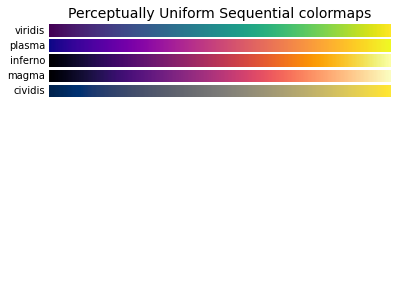

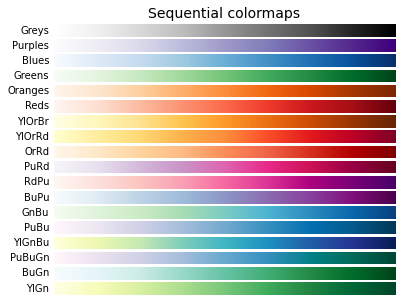

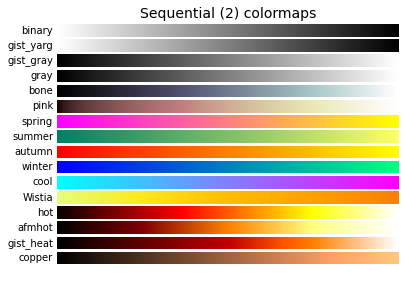

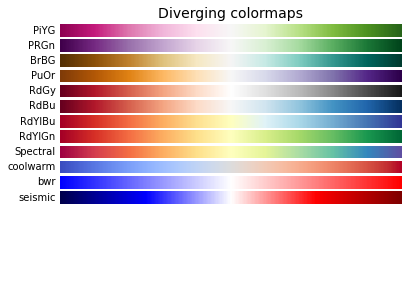

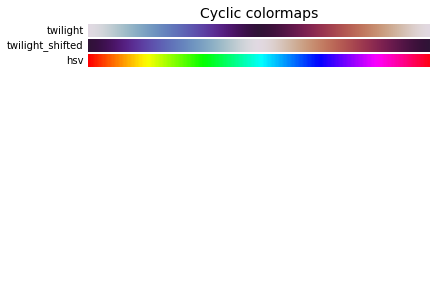

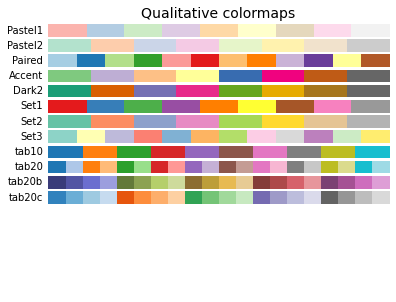

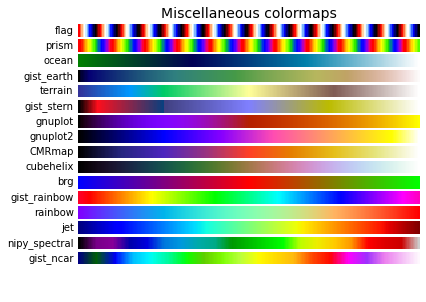

In [252]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()